# Problem set 2 (45 + 50 + 33 + 15 = 143 pts)

## Problem 1 (LU decomposition) 45 pts


### 1. LU  for band matrices and Cholesky decomposition (13 pts)

The complexity to find an LU decomposition of a dense $n\times n$ matrix is $\mathcal{O}(n^3)$.
Significant reduction in complexity can be achieved if the matrix has a certain structure, e.g. it is sparse. 
In the following task we consider an important example of $LU$ for a special type of matrices –– band matrices with top left entry equal to 1 and the bandwidth $m$ equal to 3 or 5 which called tridiagonal and pentadiagonal respectively. The bands may be ```[1, 2, 1]``` and ```[1, 1, 2, 1, 1]``` respectively

- (4 pts) Write a function ```band_lu(diag_broadcast, n)``` which computes LU decomposition for tridiagonal or pentadiagonal matrix with top left entry equal to 1 with given diagonal bands. 
For example, input parametres ```(diag_broadcast = [1,2,1], n = 4)``` mean that we need to find LU decomposition for the triangular matrix of the form:

$$A = \begin{pmatrix}
1 & 1 & 0 & 0\\
1 & 2 & 1 & 0 \\
0 & 1 & 2 & 1 \\
0 & 0 & 1 & 2 \\
\end{pmatrix}.$$

Provide the extensive testing of the implemented function that will works correctly for large $n$,  e.g. $n=100$.
As an output it is considered to make ```L``` and ```U``` - 2D arrays representing diagonals in factors $L$ (```L[0]``` keeps first lower diagonal, ```L[1]``` keeps second lower, ...), and $U$ (```U[:,0]``` keeps main diagonal, ```U[:,1]``` keeps first upper, ...).

- (2 pts) Compare execution time of the band LU decomposition using standard function from ```scipy```, i.e. which takes the whole matrix and does not know about its special structure, and band decomposition of yours implementation. Comment on the results.

- (7 pts) Write a function ```cholesky(n)``` for computing Cholesky decomposition. It should take the the single argument - the matrix that will be factorized and return the single output - lower-triangular factor $L$. Think about the efficiency of your implementation and if necessary update it to achieve the best performance (eliminate Python loops, where it is possible and so on). Explicitly describe the difference with LU decomposition that reduces the complexity from $2n^3/3$ for LU to $n^3/3$ for Cholesky. 
Test the implemented function on the Pascal matrix of given size $n$ for $n = 5, 10, 50$. 
Pascal matrix is square matrix of the following form (here for $n=4$)
$$P = \begin{pmatrix}
1 & 1 & 1 & 1\\
1 & 2 & 3 & 4 \\
1 & 3 & 6 & 10 \\
1 & 4 & 10 & 20 \\
\end{pmatrix}.$$

    [Here](https://en.wikipedia.org/wiki/Pascal_matrix) you can find more details about such matrices and analytical form for factor $L$ from Cholesky decomposition. Compare the result of your implementation with analytical expression in terms of some matrix norm of difference.  

In [1]:
from scipy.sparse import diags # can be used with broadcasting of scalars if desired dimensions are large
import numpy as np
import scipy
from scipy.linalg import lu

# INPUT : diag_broadcast - list of diagonals value to broadcast,length equal to 3 or 5; n - integer, band matrix shape.
# OUTPUT : L - 2D np.ndarray, L.shape[0] depends on bandwidth, L.shape[1] = n-1, do not store main diagonal, where all ones;                  add zeros to the right side of rows to handle with changing length of diagonals.
#          U - 2D np.ndarray, U.shape[0] = n, U.shape[1] depends on bandwidth;
#              add zeros to the bottom of columns to handle with changing length of diagonals.
def band_lu(diag_broadcast, n):
    # enter your code here
    if len(diag_broadcast) == 3:
        # this link has been used to implement the algorithm
        # https://algowiki-project.org/ru/%D0%9A%D0%BE%D0%BC%D0%BF%D0%B0%D0%BA%D1%82%D0%BD%D0%B0%D1%8F_%D1%81%D1%85%D0%B5%D0%BC%D0%B0_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%D0%B4%D0%BB%D1%8F_%D1%82%D1%80%D1%91%D1%85%D0%B4%D0%B8%D0%B0%D0%B3%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D1%8B,_%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82

        a_ld, a_ii, a_ud = diag_broadcast 
        # a_ld = A[i+1,i] - lower diagonal el.
        # a_ii = A[i,i] - diagonal el.
        # a_ud = A[i,i+1] - upper diagonal el.

        L = np.zeros((1,n-1)) # lower diagonal el.
        U = np.zeros((n, 2)) # (main | upper) diagonal els.

        # initialization
        U[0,0] = 1 # upper left entire from initial matrix
        U[0:n-1,1] = a_ud # upper diagonal elements for U

        for i in range(0, n-1):
            # if a diagonal entire = 0, then raise the error
            if U[i,0] == 0: raise ZeroDivisionError("LU does not exist. Pivoting is required")
            # calculate i-th lower diagonal element for L
            L[0,i] = a_ld / U[i,0]
            # calculate i-th diagonal element for U
            U[i+1,0] = a_ii - L[0,i] * U[i,1]
        return L,U

    elif len(diag_broadcast) == 5:
        a_lld, a_ld, a_ii, a_ud, a_uud = diag_broadcast
        # a_lld = A[i+2,i] - lower-lower diagonal el.
        # a_ld = A[i+1,i] - lower-diagonal el.
        # a_ii = A[i,i] - diagonal el.
        # a_ud = A[i,i+1] - upper-diagonal el.
        # a_uud = A[i,i+2] - upper-upper diagonal el.
        
        L = np.zeros((2,n-1)) # (lower-lower | lower) diagonal els.
        U = np.zeros((n, 3)) # (main | upper | upper-upper) diagonal ela.
        
        # initialization
        U[0,0] = 1 # upper left entire from initial matrix
        U[0,1] =  a_ud
        U[0:n-2,2] = a_uud # upper-upper diagonal

        for i in range(0,n-1):
            # if a diagonal entire = 0, then raise the error
            if U[i,0] == 0: raise ZeroDivisionError("LU does not exist. Pivoting is required")
            if i == 0:  
                L[1,i] = a_ld / U[i,0] # lower diagonal el.
                U[i+1,0] = a_ii - L[1,i]*U[i,1] # diagonal el.
            elif i >= 1 and i <= n-2:
                L[0,i] = a_lld / U[i-1,0] # lower-lower diagonal el.
                L[1,i] = (a_ld - L[0,i]*U[i-1,1]) / U[i,0] # lower diagonal el.
                U[i+1,0] = a_ii - L[0,i]*U[i-1,2] - L[1,i]*U[i,1] # diagonal el.
            if i <= n-3:
                U[i+1,1] = a_ud - L[1,i]*U[i,2] # upper diagonal el.
        return L,U

    else:
        raise NotImplementedError()
 
def cholesky(A):
    # enter your code here
    # the following algorithm was written using: https://ru.abcdef.wiki/wiki/Cholesky_decomposition
    L = np.zeros_like(A,dtype=object)
    n = A.shape[0]
    
    # initialization
    L[0,0] = A[0,0]**0.5
    L[1:n,0] = A[1:n,0] / L[0,0]

    for i in range(1,n):
        L[i,i] = (A[i,i] - np.sum(L[i,0:i]**2))**0.5

        for j in range(i+1,n):
            L[j,i] = (A[j,i] - np.sum(L[j,0:i]*L[i,0:i])) / L[i,i] 
    return L

# to compare obtained results
def naive_LU(A):
    n = A.shape[0]
    for k in range(n-1):                
        for i in range(k+1,n): 
            if A[k,k]==0: raise ZeroDivisionError("LU does not exist. Pivot is equal to zero. Pivot number",k)
            A[i,k] /= A[k,k] # L[i,k] = A[i,k]/A[k,k]
            # without loop
            A[i,k+1:n] -= A[i,k]*A[k,k+1:n]
            # with loop
#             for j in range(k+1,n):      
#                 A[i,j] -= A[i,k]*A[k,j]

    # L consists of all elements lower main diagonal. Main diagonal - ones
    L = np.tril(A,k=-1) + np.eye(n)
    # U consists of all elements upper -1 diagonal
    U = np.triu(A)
    return L,U

In [2]:
# Your solution is here

**3-diagonal case**

Consider toy example of 3*3 matrix to derive explicit formulas (suppose that $l_{ii} = 1$):

$
\begin{bmatrix}
a_{11} & a_{12} & 0 \\
a_{21} & a_{22} & a_{23} \\
0 & a_{32} & a_{33} \\
\end{bmatrix}
= 
\begin{bmatrix}
l_{11} & 0 & 0 \\
l_{21} & l_{22} & 0 \\
l_{31} & l_{32} & l_{33} \\
\end{bmatrix}
\begin{bmatrix}
u_{11} & u_{12} & u_{13} \\
0 & u_{22} & u_{23} \\
0 & 0 & u_{33} \\
\end{bmatrix}
$

1. $l_{11}u_{11} = a_{11} \Rightarrow u_{11} = a_{11}$
2. $l_{11}u_{12} = a_{12} \Rightarrow u_{12} = a_{12}$
3. $l_{11}u_{13} = 0 \Rightarrow u_{13} = 0$
4. $l_{21}u_{11} = a_{21} \Rightarrow l_{21} = \frac{a_{21}}{u_{11}}$
5. $l_{21}u_{12} + l_{22}u_{22} = a_{22} \Rightarrow u_{22} = a_{22} - l_{21}u_{12}$
6. $l_{22}u_{23} = a_{23} \Rightarrow u_{23} = a_{23}$
7. $l_{31}u_{11} = 0 \Rightarrow l_{31} = 0$
8. $l_{32}u_{22} = a_{32} \Rightarrow l_{32} = \frac{a_{32}}{u_{22}}$
9. $l_{32}u_{23} + l_{33}u_{33} = a_{33} \Rightarrow u_{33} = a_{33} - l_{32}u_{23}$

Let's summarize this algorithm for 3-diagonal band matrix:

$u_{11} = a_{11}$

$u_{i,i+1} = a_{i,i+1}, i \in [1,n-1]$

$l_{i+1,i} = \frac{a_{i+1,i}}{u_{ii}}, i \in [1,n-1]$

$u_{ii} = a_{ii} - l_{i,i-1}u_{i-1,i}, i \in [2,n]$

**5-diagonal case**

Consider toy example of 3*3 matrix to derive explicit formulas (suppose that $l_{ii} = 1$):

$
\begin{bmatrix}
a_{11} & a_{12} & a_{13} & 0 & 0\\
a_{21} & a_{22} & a_{23} & a_{24} & 0\\
a_{31} & a_{32} & a_{33} & a_{34} & a_{35}\\
0 & a_{42} & a_{43} & a_{44} & a_{45}\\
0 & 0 & a_{53} & a_{54} & a_{55}\\
\end{bmatrix}
= 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\
l_{21} & 1 & 0 & 0 & 0 \\
l_{31} & l_{32} & 1 & 0 & 0 \\
l_{41} & l_{42} & l_{43} & 1 & 0 \\
l_{51} & l_{52} & l_{53} & l_{54} & 1 \\
\end{bmatrix}
\begin{bmatrix}
u_{11} & u_{12} & u_{13} & u_{14} & u_{15}\\
0 & u_{22} & u_{23} & u_{24} & u_{25}\\
0 & 0 & u_{33} & u_{34} & u_{35}\\
0 & 0 & 0 & u_{44} & u_{45}\\
0 & 0 & 0 & 0 & u_{55}\\
\end{bmatrix}
$

The same approach leads to the following set of formulas (indexes from $1$ to $n-1$):

The first row of $u$:
$u_{1i} = a_{1i}, i \in [0,n-3]$

Lower-lower diagonal elements: 
$l_{i+2,i} = \frac{a_{i+2,i}}{u_{ii}}, i \in [1,n-2] $

Lower diagonal elements:
$
\begin{equation*}
l_{i+1,i} = 
 \begin{cases}
   \frac{a_{i+1,i}}{u_{ii}}, i = 0 \\
   \frac{a_{i+1,i} - l_{i+1,i-1}u_{i-1,i}}{u_{ii}}, i \in [1,n-2] \\
 \end{cases}
\end{equation*}
$

Diagonal elements: 
$
\begin{equation*}
u_{ii} = 
 \begin{cases}
   a_{ii} - l_{i,i-1}u_{i-1,i}, i = 1 \\
   a_{ii} - l_{i,i-2}u_{i-2,i} - l_{i,i-1}u_{i-1,i}, i \in [3,n] \\
 \end{cases}
\end{equation*}
$

Upper diagonal elements:
$u_{i,i+1} = a_{i,i+1} - l_{i,i-1}u_{i-1,i+1}, i \in [1,n-2]$

Upper-upper diagonal elements:
$u_{i,i+2} = a_{i,i+2}, i \in [1,n-3]$

## **Task 1.1.1**

In [3]:
# just to show
n = 5
P = scipy.linalg.pascal(n, kind='symmetric', exact=True)
print('Pascal matrix:\n',np.array(P,dtype=np.float32))

Pascal matrix:
 [[ 1.  1.  1.  1.  1.]
 [ 1.  2.  3.  4.  5.]
 [ 1.  3.  6. 10. 15.]
 [ 1.  4. 10. 20. 35.]
 [ 1.  5. 15. 35. 70.]]


In [4]:
# just to show marices to be decomposed
def gen_matrix(diag_broadcast,n):
    opt_1 = [-1,0,1]
    opt_2 = [-2,-1,0,1,2]
    opt = opt_1 if len(diag_broadcast) == 3 else opt_2
    A = diags(diag_broadcast,opt, shape=(n,n)).toarray()
    A[0,0] = 1 # this element is equal to zero (always)
    return A

# function to reconstruct L,U in normal form (3 diagonals)
def LU3_reconstruct(n, L, U):
    # diagonal of ones + lower diagonal
    L0 = np.eye(n) + diags(list(L[0,:]), -1).toarray()
    # diagonal and upper diagonal
    U0 = diags([list(U[:,0]),list(U[:,1])],[0,1]).toarray()
    return L0, U0

# function to reconstruct L,U in normal form (5 diagonals)
def LU5_reconstruct(n, L, U):
    # diagonal of ones + lower lower diagonal + lower diagonal
    L0 = np.eye(n) + diags([list(L[0,1:]),list(L[1,:])], [-2,-1]).toarray()
    # diagonal, upper diagonal and upper upper diagonal
    U0 = diags([list(U[:,0]),list(U[:,1]),list(U[:,2])],[0,1,2]).toarray()
    return L0, U0

diag_broadcast, n = [1, 2, 1], 5
A1 = gen_matrix(diag_broadcast,n)
print(A1,'\n')
diag_broadcast, n = [1, 1, 2, 1, 1], 7
A2 = gen_matrix(diag_broadcast,n)
print(A2,'\n')

[[1. 1. 0. 0. 0.]
 [1. 2. 1. 0. 0.]
 [0. 1. 2. 1. 0.]
 [0. 0. 1. 2. 1.]
 [0. 0. 0. 1. 2.]] 

[[1. 1. 1. 0. 0. 0. 0.]
 [1. 2. 1. 1. 0. 0. 0.]
 [1. 1. 2. 1. 1. 0. 0.]
 [0. 1. 1. 2. 1. 1. 0.]
 [0. 0. 1. 1. 2. 1. 1.]
 [0. 0. 0. 1. 1. 2. 1.]
 [0. 0. 0. 0. 1. 1. 2.]] 



## **Compare naive LU results and band LU (check correctness)**

In [5]:
diag_broadcast, n = [6, 4, -2],75
# generate 3-diag matrix
D3 = gen_matrix(diag_broadcast,n)
# band LU + reconstruction
L0,U0 = band_lu(diag_broadcast, n)
Lb,Ub = LU3_reconstruct(n, L0, U0)
# naive LU
Ln,Un = naive_LU(D3)

# compare results
(Lb == Ln).all(), (Ub == Un).all()

(True, True)

In [6]:
diag_broadcast, n = [-1, 6, 4, 2,3],68
# generate 5-diag matrix
D5 = gen_matrix(diag_broadcast,n)
# band LU + reconstruction
L0,U0 = band_lu(diag_broadcast, n)
Lb,Ub = LU5_reconstruct(n, L0, U0)
# naive LU
Ln,Un = naive_LU(D5)

# compare results
(Lb == Ln).all(), (Ub == Un).all()

(True, True)

## **Compare results of initial matrix and restored from band LU (check correctness)**

In [7]:
# test to show
diag_broadcast, n = [1, 2, 1], 5
# band LU + reconstruction
L0,U0 = band_lu(diag_broadcast, n)
L, U = LU3_reconstruct(n, L0, U0)
print('L=\n',L0,'\n')
print('U=\n',U0,'\n')
print('LU=\n',L @ U,'\n')

# test for large n
n = 100
A3_test = gen_matrix(diag_broadcast,n)
L0,U0 = band_lu(diag_broadcast, n)
L, U = LU3_reconstruct(n, L0, U0)
# compare
print('Close elements:\n',np.isclose(A3_test, L @ U),'\n')
# try to find at leas a single mistake
print('The number of incorrect elements = ',np.sum(np.isclose(A3_test, L @ U) == False))

L=
 [[1. 1. 1. 1.]] 

U=
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]] 

LU=
 [[1. 1. 0. 0. 0.]
 [1. 2. 1. 0. 0.]
 [0. 1. 2. 1. 0.]
 [0. 0. 1. 2. 1.]
 [0. 0. 0. 1. 2.]] 

Close elements:
 [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]] 

The number of incorrect elements =  0


In [8]:
# test to show
diag_broadcast, n = [1, 1, 2, 1, 3], 7 # FOR BAND [1,1,2,1,1] LU DOES NOT EXIST!!!
# band LU + reconstruction
L0,U0 = band_lu(diag_broadcast, n)
L, U = LU5_reconstruct(n, L0, U0)
print('L=\n',L0,'\n')
print('U=\n',U0,'\n')
print('LU=\n',L @ U,'\n')

# test for large n
n = 100
A5_test = gen_matrix(diag_broadcast,n)
L0,U0 = band_lu(diag_broadcast, n)
L, U = LU5_reconstruct(n, L0, U0)
# compare
print('Close elements:\n',np.isclose(A5_test, L @ U),'\n')
# try to find at leas a single mistake
print('The number of incorrect elements = ',np.sum(np.isclose(A5_test, L @ U) == False))

L=
 [[ 0.          1.          1.         -1.          0.5        -0.2       ]
 [ 1.          0.         -3.          1.          0.8         0.28571429]] 

U=
 [[ 1.   1.   3. ]
 [ 1.  -2.   3. ]
 [-1.   1.   3. ]
 [ 2.  10.   3. ]
 [-5.  -2.   3. ]
 [ 2.1 -1.4  0. ]
 [ 3.   0.   0. ]] 

LU=
 [[1. 1. 3. 0. 0. 0. 0.]
 [1. 2. 1. 3. 0. 0. 0.]
 [1. 1. 2. 1. 3. 0. 0.]
 [0. 1. 1. 2. 1. 3. 0.]
 [0. 0. 1. 1. 2. 1. 3.]
 [0. 0. 0. 1. 1. 2. 1.]
 [0. 0. 0. 0. 1. 1. 2.]] 

Close elements:
 [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]] 

The number of incorrect elements =  0


## **Task 1.1.2**

**(2 pts) Compare execution time of the band LU decomposition using standard function from ```scipy```, i.e. which takes the whole matrix and does not know about its special structure, and band decomposition of yours implementation. Comment on the results.**

In [9]:
from tqdm import tqdm
import scipy

dim_range = np.linspace(100, 5000, num=20, dtype=int)

# broadcast options
diag_broadcast_LU3 = [1, 2, 1]
diag_broadcast_LU5 = [1, 1, 2, 1, 3]

# dicts for data
LU3 = {'My':[],'Scipy':[]}
LU5 = {'My':[],'Scipy':[]}

for n in tqdm(dim_range):
    t_my3 = %timeit -o -q -n 3 band_lu(diag_broadcast_LU3, n)
    t_my5 = %timeit -o -q -n 3 band_lu(diag_broadcast_LU5, n)
    A3 = gen_matrix(diag_broadcast_LU3,n)
    t_scipy3 = %timeit -o -q -n 3 scipy.linalg.lu(A3,permute_l=False)
    A5 = gen_matrix(diag_broadcast_LU5,n)
    t_scipy5 = %timeit -o -q -n 3 scipy.linalg.lu(A5,permute_l=False)
    LU3['My'].append(t_my3)
    LU5['My'].append(t_my5)
    LU3['Scipy'].append(t_scipy3)
    LU5['Scipy'].append(t_scipy5)

100%|██████████| 20/20 [04:15<00:00, 12.76s/it]


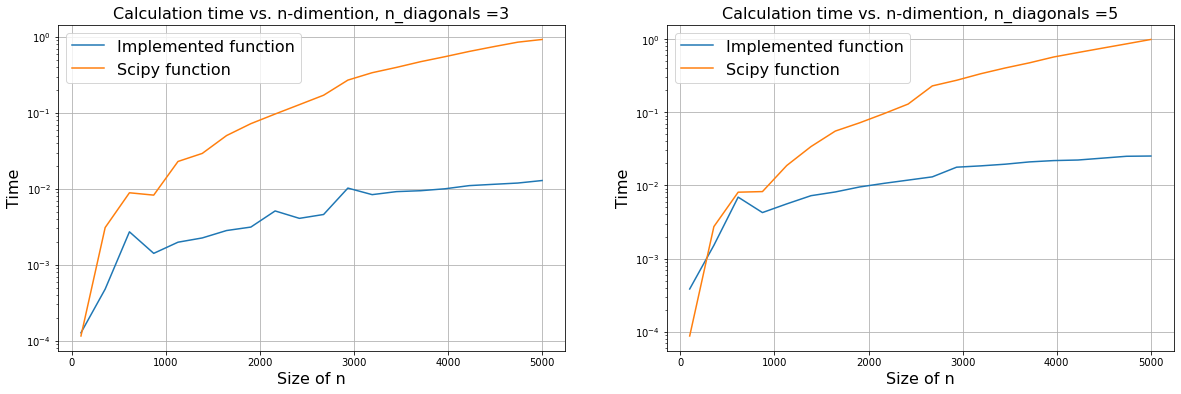

In [10]:
import matplotlib.pyplot as plt

LABELS = ['','','','']
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
My3,My5,Scipy3,Scipy5 = [],[],[],[]
for i in range(len(dim_range)):
    My3.append(LU3['My'][i].average)
    My5.append(LU5['My'][i].average)
    Scipy3.append(LU3['Scipy'][i].average)
    Scipy5.append(LU5['Scipy'][i].average)

ax1.plot(dim_range,My3,label='Implemented function')
ax2.plot(dim_range,My5,label='Implemented function')
ax1.plot(dim_range,Scipy3,label='Scipy function')
ax2.plot(dim_range,Scipy5,label='Scipy function')

for ax,d in zip([ax1,ax2],[3,5]):
    ax.set_title('Calculation time vs. n-dimention, n_diagonals ='+str(d),fontsize=16)
    ax.set_xlabel('Size of n',fontsize=16)
    ax.set_ylabel('Time',fontsize=16)
    ax.set_yscale("log")
    ax.legend(fontsize=16)
    ax.grid()

## Using these results we can conclude that custom method `band_lu` works much faster than `scipy.linalg.lu` method. This performance caused by spetial structure of this matrix and that we use this knowledge. Complexity of `band_lu` is linear and for `scipy.linalg.lu` complexity is cubic.

## **Task 1.1.3**

**(7 pts) Write a function ```cholesky(n)``` for computing Cholesky decomposition. It should take the the single argument - the matrix that will be factorized and return the single output - lower-triangular factor $L$. Think about the efficiency of your implementation and if necessary update it to achieve the best performance (eliminate Python loops, where it is possible and so on). Explicitly describe the difference with LU decomposition that reduces the complexity from $2n^3/3$ for LU to $n^3/3$ for Cholesky. 
Test the implemented function on the Pascal matrix of given size $n$ for $n = 5, 10, 50$. 
Pascal matrix is square matrix of the following form (here for $n=4$)
$$P = \begin{pmatrix}
1 & 1 & 1 & 1\\
1 & 2 & 3 & 4 \\
1 & 3 & 6 & 10 \\
1 & 4 & 10 & 20 \\
\end{pmatrix}.$$**

## The difference between LU and Cholesky is obvious: LU requires calculation of two diagonal matrices that twice higher than for Cholesky.

**Test the implemented function on the Pascal matrix of given size $n$ for $n = 5, 10, 50$.**

In [11]:
n = 5
P = scipy.linalg.pascal(n, kind='symmetric', exact=True)
L = cholesky(P)
print('Total difference for n = 5:', np.sum(np.abs(L @ L.T - P)**2))

n = 10
P = scipy.linalg.pascal(n, kind='symmetric', exact=True)
L = cholesky(P)
print('Total difference for n = 10:', np.sum(np.abs(L @ L.T - P)**2))

n = 50
P = scipy.linalg.pascal(n, kind='symmetric', exact=True)
L = cholesky(P)
print('Total difference for n = 50:', np.sum(np.abs(L @ L.T - P)**2))

Total difference for n = 5: 0.0
Total difference for n = 10: 0.0
Total difference for n = 50: 0.011144022750634613


**Compare the result of your implementation with analytical expression in terms of some matrix norm of difference.**

$$\text{ Analytical expression: } L_{ij} = \frac{i!}{j!(i-j)!}, j \leq i, \text{ where } i \in [0,n-1]$$

$$ \text{ I have chosen sqared Frobenius norm of the difference: } \Vert A \Vert_F^2 = {\sum_{i=1}^n \sum_{j=1}^n |L_{ij} - \hat{L_{ij}}|^2} $$

Here $L_{ij}$ is an analytical result and $\hat{L_{ij}}$ is computational result.

In [12]:
# factorial calculation
def fact(n):
    f = np.prod(np.arange(1,n+1))
    return f

# analytical L calculation
def analytical_L(n):
    L = np.zeros((n,n),dtype=object)
    for i in range(0,n):
        for j in range(0,i+1):
            L[i,j] = fact(i) / fact(j) / fact(i-j)
    return L

n = 5
P = scipy.linalg.pascal(n, kind='symmetric', exact=True)
L = cholesky(P)
L_analytical = analytical_L(n)
print('Total difference for n = 5:', np.sum(np.abs(L_analytical - L)**2))

n = 10
P = scipy.linalg.pascal(n, kind='symmetric', exact=True)
L = cholesky(P)
L_analytical = analytical_L(n)
print('Total difference for n = 10:', np.sum(np.abs(L_analytical - L)**2))

n = 50
P = scipy.linalg.pascal(n, kind='symmetric', exact=True)
L = cholesky(P)
L_analytical = analytical_L(n)
print('Total difference for n = 50:', np.sum(np.abs(L_analytical - L)**2))

Total difference for n = 5: 0.0
Total difference for n = 10: 0.0
Total difference for n = 50: 3.7805734095298863e+28


### 2. Stability of LU (8 pts)

* (4 pts) Show, that for these  matrices $A$ and $B$ LU decomposition fails. Why does it happen?



$
A = \begin{pmatrix}
0 & 1 \\
2 & 3
\end{pmatrix}.$ 

$B = \begin{pmatrix}
1 & 1 & 0\\
1 & 1 & 2 \\
1 & 2 & 1
\end{pmatrix}.$ 

* (4 pts) In the LU decomposition, a pivot position is a position of the element that identifies the row and column that will be eliminated in the current step. For example, first pivot in LU is usually the left top element. What value of $c$ leads to zero in the second pivot position? What $c$ produces zero in the third pivot position? What modification of LU should we use in order to address the possible zeros in pivot position?

$A = \begin{pmatrix}
1 & c & 0\\
2 & 4 & 1 \\
3 & 5 & 1
\end{pmatrix}.$ 

In [13]:
# Your solution is here

## **Task 1.2.1**

**(4 pts) Show, that for these  matrices $A$ and $B$ LU decomposition fails. Why does it happen?
$
A = \begin{pmatrix}
0 & 1 \\
2 & 3
\end{pmatrix}.$ 
$B = \begin{pmatrix}
1 & 1 & 0\\
1 & 1 & 2 \\
1 & 2 & 1
\end{pmatrix}.$**

$
A = \begin{pmatrix}
0 & 1 \\
2 & 3
\end{pmatrix}
=
LU
=
\begin{pmatrix}
l_{11} & 0 \\
l_{21} & l_{22}
\end{pmatrix}
\begin{pmatrix}
u_{11} & u_{12} \\
0 & u_{22}
\end{pmatrix}
=
\begin{pmatrix}
l_{11}u_{11} & l_{11}u_{12} \\
l_{21}u_{11} & l_{21}u_{12} + l_{11}u_{22}
\end{pmatrix}
$ 

So, we can obtain the following system of equations:
$$
 \begin{cases}
 l_{11}u_{11} = 0\\
 l_{11}u_{12} = 1\\
 l_{21}u_{11} = 2\\
 l_{21}u_{12} + l_{11}u_{22} = 3\\
 \end{cases}
$$

From the first ecuation we can conclude that $l_{11} = 0$ or $u_{11} = 0$. But it is not compartible with the second or the third equation (we cannot achieve it simultaneously). 

**So, $LU$ decomposition fails in this case.**

$
B = \begin{pmatrix}
1 & 1 & 0\\
1 & 1 & 2 \\
1 & 2 & 1
\end{pmatrix}
=
LU
=
\begin{pmatrix}
l_{11} & 0 & 0 \\
l_{21} & l_{22} & 0 \\
l_{31} & l_{32} & l_{33} \\
\end{pmatrix}
\begin{pmatrix}
u_{11} & u_{12} & u_{13} \\
0 & u_{22} & u_{23} \\
0 & 0 & u_{33}
\end{pmatrix}
=
\begin{pmatrix}
l_{11}u_{11} & l_{11}u_{12} & l_{11}u_{13}\\
l_{21}u_{11} & l_{21}u_{12} + l_{22}u_{22} & l_{21}u_{13} + l_{22}u_{23}\\
l_{31}u_{11} & l_{31}u_{12} + l_{32}u_{22} & l_{31}u_{13} + l_{32}u_{23} + l_{33}u_{33}\\
\end{pmatrix}
$ 

So, we can obtain the following system of equations:

$
 \begin{cases}
l_{11}u_{11} = 1\\
l_{11}u_{12} = 1\\
l_{11}u_{13} = 0\\
l_{21}u_{11} = 1\\
l_{21}u_{12} + l_{22}u_{22} = 1\\
l_{21}u_{13} + l_{22}u_{23} = 2\\
l_{31}u_{11} = 1\\
l_{31}u_{12} + l_{32}u_{22} = 2\\
l_{31}u_{13} + l_{32}u_{23} + l_{33}u_{33} = 1\\
 \end{cases}
\Rightarrow
 \begin{cases}
l_{11}u_{11} = 1\\
l_{11}u_{12} = 1\\
l_{21}u_{11} = 1\\
l_{21}u_{12} + l_{22}u_{22} = 1\\
l_{22}u_{23} = 2\\
l_{31}u_{11} = 1\\
l_{31}u_{12} + l_{32}u_{22} = 2\\
l_{32}u_{23} + l_{33}u_{33} = 1\\
 \end{cases}
\Rightarrow
 \begin{cases}
lu = 1\\
lu + l_{22}u_{22} = 1\\
l_{22}u_{23} = 2\\
lu + l_{32}u_{22} = 2\\
l_{32}u_{23} + l_{33}u_{33} = 1\\
 \end{cases}
\Rightarrow
 \begin{cases}
l_{22}u_{22} = 0\\
l_{22}u_{23} = 2\\
l_{32}u_{22} = 1\\
l_{32}u_{23} + l_{33}u_{33} = 1\\
 \end{cases}
$

1. From the first-third ecuations we can conclude that $l_{11} \neq 0$ and $u_{13} = 0$. 
2. From the first-second ecuations we can conclude that $u_{11} = u_{12} = u$, from first, third and sixth: $l_{11} = l_{21} =l_{31} =l $ 
3. After simplification we can see that the first equation is not compartible with the second and third equations since it requires $l_{22} = 0$ or $u_{22} = 0$

**So, $LU$ decomposition fails in this case.**

## **Task 1.2.2**
**(4 pts) In the LU decomposition, a pivot position is a position of the element that identifies the row and column that will be eliminated in the current step. For example, first pivot in LU is usually the left top element. What value of $c$ leads to zero in the second pivot position? What $c$ produces zero in the third pivot position? What modification of LU should we use in order to address the possible zeros in pivot position?
$A = \begin{pmatrix}
1 & c & 0\\
2 & 4 & 1 \\
3 & 5 & 1
\end{pmatrix}.$** 



Let's consider $LU$ decomposition of this matrix step-by step. Assume that the main diagonal of $L$ consists of ones i.e: $l_{ii}=1,\forall i \in [1,n]$.

$
A = 
LU
=
\begin{pmatrix}
1 & c & 0\\
2 & 4 & 1 \\
3 & 5 & 1
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0 \\
l_{21} & 1 & 0 \\
l_{31} & l_{32} & 1 \\
\end{pmatrix}
\begin{pmatrix}
u_{11} & u_{12} & u_{13} \\
0 & u_{22} & u_{23} \\
0 & 0 & u_{33}
\end{pmatrix}
$

1. It's obvious that $u_{11} = 1,u_{12} = c, u_{13} = 0$.
2. $l_{21}u_{11}=2 \Rightarrow l_{21}=2$
3. $l_{21}u_{12}+u_{22}=4 \Rightarrow u_{22} = 4 - l_{21}u_{12} = 4 - 2c$

$u_{22}$ is the second pivot. Let $u_{22}=0 \Rightarrow 4 = 2c \Rightarrow c = 2$

Let's proced:

4. $l_{21}u_{13}+u_{23}=1 \Rightarrow u_{23}=1 - l_{21}u_{13} = 1 - 2\cdot0 = 1$
5. $l_{31}u_{11}=3 \Rightarrow l_{31} = 3$
6. $l_{31}u_{12}+l_{32}u_{22}=5 \Rightarrow l_{32} =\frac{ 5 - l_{31}u_{12}}{u_{22}} = \frac{ 5 - 3c}{4-2c}$
7. $l_{31}u_{13}+l_{32}u_{23}+u_{33}=1 \Rightarrow u_{33} = 1 - l_{31}u_{13}-l_{32}u_{23} = 1 - 3\cdot0 - \frac{ 5 - 3c}{4-2c} \cdot 1 = \frac{ c - 1}{4-2c}$

$u_{33}$ is the third pivot. Let $u_{33}=0 \Rightarrow \frac{ c - 1}{4-2c} = 0 \Rightarrow c = 1$

**Answer:** $c = 2$ leads to zero in the second pivot and $c = 1$ leads to zero in the third pivot.
## Here we can test it:

### $c = 2$

In [15]:
c = 2
A = np.array([[1,c,0],
            [2,4,1],
            [3,5,1]])
L,U = naive_LU(A)
print('The third pivot is:',U[2,2])

ZeroDivisionError: ('LU does not exist. Pivot is equal to zero. Pivot number', 1)

### $c = 1$

In [16]:
c = 1
A = np.array([[1,c,0],
            [2,4,1],
            [3,5,1]])
L,U = naive_LU(A)
print('The third pivot is:',U[2,2])

The third pivot is: 0


## **To avoid zero pivots it is better to use LU decomposition with pivoting (PLU decomposition).**

### 3. Implementation of PLU decomposition (14 pts)

As you have noticed before, LU decomposition may fail. In order to make it stable, we can use LU decomposition with pivoting  (PLU).

We want to find such permutation matrix $P$ that LU decomposition of $PA$ exists

$$ PA = LU $$

- (7 pts) Implement efficiently PLU decomposition (without loops and with appropriate level of BLAS operations).  Also, pay attention to the way of permutation matrix storage.

- (4 pts ) Compare your function for computing PLU with built-in function on matrices of such type ```(mirror_diag = [1,2,1], n = 4)```. (Bandwidth and matrix size may vary). So, you can pass them as dense 2D NumPy array and do not tune your implementation to this special structure. Compare them in terms of running time (use ```%timeit``` magic) for range of dimensions to recover the asymptotic rate of time increasing and in terms of acuracy. We expect you plot the running time vs matrix dimension for built-in function and your implementation. So you should get the plot with two lines.
Consider additionally one of the pathological examples from above, where LU fails, but PLU has to work.


$$A = \begin{pmatrix}
0 & 0 & 1 & 1 \\
 0 &1 & 2 & 1  \\
 1 & 2 & 1  & 0\\
1 & 2  & 0 & 0  \\
\end{pmatrix}.$$


- (3 pts) Discuss the obtained results and explain how is it possible to accelerate computing the PLU factorization. 

NumPy or JAX are both ok in this problem, but please use the single library for all implementations. 

In [17]:
# Your solution is here

## **Task 1.3.1**
**(7 pts) Implement efficiently PLU decomposition (without loops and with appropriate level of BLAS operations).  Also, pay attention to the way of permutation matrix storage.**

In [18]:
import numpy as np
from scipy.sparse import diags 
from numba import njit

# @njit
def LUP_decompose(A):
    n = A.shape[0]
    # permutation vector (can be reshaped to the matrix)
    p = np.arange(0,n)
    for i in range(n-1):
        # find pivot index
        piv_idx = i + np.argmax(np.abs(A[i:n,i]))
        pivot_val = np.abs(A[piv_idx,i])
        if pivot_val != 0:
            # exchange rows of p
            p[i],p[piv_idx] = p[piv_idx],p[i]
            # exchange rows of A
            A[[i, piv_idx]] = A[[piv_idx, i]] # doesn't work with jit
#             A[i,:],A[piv_idx,:] = np.copy(A[piv_idx,:]),np.copy(A[i,:])
            
            # LU decomposition
            for j in range(i+1,n):
                A[j,i] /= A[i,i]
                A[j,i+1:n] -= A[j,i] * A[i,i+1:n]
        else:
            raise ZeroDivisionError('Pivot is equal to zero! LUP does not exist.')
    # L consists of all elements lower main diagonal. Main diagonal - ones
    L = np.tril(A,k=-1) + np.eye(n)
    # U consists of all elements higher -1 diagonal
    U = np.triu(A)
    # reconstruct permutation matrix
    P = np.eye(n)[:,p]
    return P,L,U

## **Let's test PLU for large random matrix**

In [19]:
n = 99
M = np.random.randn(n,n)
P,L,U = LUP_decompose(np.copy(M))

# compare
print('Close elements:\n',np.isclose(P @ L @ U,M),'\n')
# try to find at leas a single mistake
print('The number of incorrect elements = ',np.sum(np.isclose(P @ L @ U,M) == False))

Close elements:
 [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]] 

The number of incorrect elements =  0


## **Task 1.3.2**
**(4 pts ) Compare your function for computing PLU with built-in function on matrices of such type ```(mirror_diag = [1,2,1], n = 4)```. (Bandwidth and matrix size may vary). So, you can pass them as dense 2D NumPy array and do not tune your implementation to this special structure. Compare them in terms of running time (use ```%timeit``` magic) for range of dimensions to recover the asymptotic rate of time increasing and in terms of acuracy. We expect you plot the running time vs matrix dimension for built-in function and your implementation. So you should get the plot with two lines.
Consider additionally one of the pathological examples from above, where LU fails, but PLU has to work.
$$A = \begin{pmatrix}
0 & 0 & 1 & 1 \\
 0 &1 & 2 & 1  \\
 1 & 2 & 1  & 0\\
1 & 2  & 0 & 0  \\
\end{pmatrix}.$$**

In [20]:
# just to show marices to be decomposed
def band_matrix(diag_broadcast,n):
    length = len(diag_broadcast)
    assert len(diag_broadcast)%2 == 1
    diagonals = [int(i-(length-1)/2) for i in range(length)]
    A = diags(diag_broadcast,diagonals,shape=(n,n)).toarray()
    return A

n=7
diag_broadcast = [1,2,1]
D = band_matrix(diag_broadcast,n)
print(D)

[[2. 1. 0. 0. 0. 0. 0.]
 [1. 2. 1. 0. 0. 0. 0.]
 [0. 1. 2. 1. 0. 0. 0.]
 [0. 0. 1. 2. 1. 0. 0.]
 [0. 0. 0. 1. 2. 1. 0.]
 [0. 0. 0. 0. 1. 2. 1.]
 [0. 0. 0. 0. 0. 1. 2.]]


In [21]:
from tqdm import tqdm
import scipy

dim_range = np.linspace(100, 1000, num=16, dtype=int)

# broadcast options
diag_broadcast_LU = [1, 2, 1]

# data storage
LU = {'My':[],'Scipy':[]}

for n in tqdm(dim_range):
    D = band_matrix(diag_broadcast,n)
    t_my = %timeit -o -q -n 3 LUP_decompose(D)
    t_scipy = %timeit -o -q -n 3 scipy.linalg.lu(D)
    LU['My'].append(t_my)
    LU['Scipy'].append(t_scipy)

100%|██████████| 16/16 [04:18<00:00, 16.16s/it]


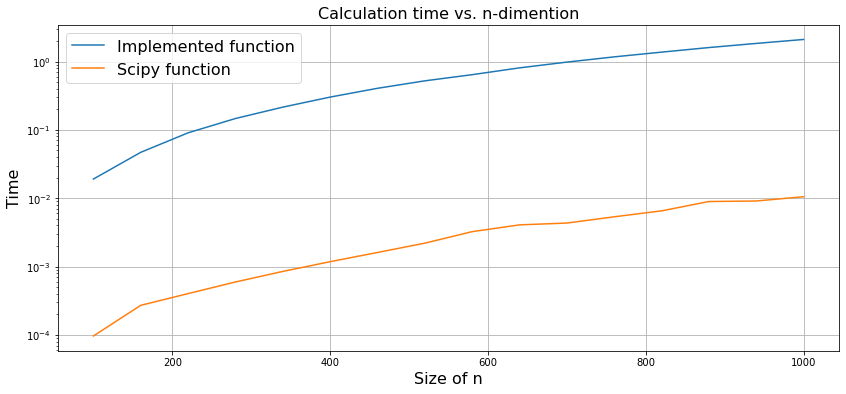

In [22]:
import matplotlib.pyplot as plt

LABELS = ['','','','']
plt.figure(figsize=(14,6))
plt.title('Calculation time vs. n-dimention',fontsize=16)
My,Scipy = [],[]
for i in range(len(dim_range)):
    My.append(LU['My'][i].average)
    Scipy.append(LU['Scipy'][i].average)
    
plt.plot(dim_range,My,label='Implemented function')
plt.plot(dim_range,Scipy,label='Scipy function')
plt.xlabel('Size of n',fontsize=16)
plt.ylabel('Time',fontsize=16)
plt.legend(fontsize=16)
plt.yscale("log")
plt.grid()

In [23]:
np.mean(np.array(My)/np.array(Scipy)) 

216.83015475828313

### **Consider 3 examples where LU fails: A matrix from the assignment, band matrix from the 1st task and matrix from task 1.2.2**

In [24]:
A = np.array([[0,0,1,1],
              [0,1,2,1],
              [1,2,1,0],
              [1,1,0,0]])

print('Matrix\n',A,'\n')
try:
    P,L,U = naive_LU(A)
except:
    print('Naive LU fails')

P,L,U = LUP_decompose(np.copy(A))
np.isclose(P @ L @ U,A)

Matrix
 [[0 0 1 1]
 [0 1 2 1]
 [1 2 1 0]
 [1 1 0 0]] 

Naive LU fails


array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [25]:
# just to show marices to be decomposed
def gen_matrix(diag_broadcast,n):
    opt_1 = [-1,0,1]
    opt_2 = [-2,-1,0,1,2]
    opt = opt_1 if len(diag_broadcast) == 3 else opt_2
    A = diags(diag_broadcast,opt, shape=(n,n)).toarray()
    A[0,0] = 1 # this element is equal to zero (always)
    return A

diag_broadcast, n = [1, 1, 2, 1, 1], 7
A = gen_matrix(diag_broadcast,n)

print('Matrix\n',A,'\n')
try:
    P,L,U = naive_LU(A)
except:
    print('Naive LU fails\n')

P,L,U = LUP_decompose(np.copy(A))
np.isclose(P @ L @ U,A)

Matrix
 [[1. 1. 1. 0. 0. 0. 0.]
 [1. 2. 1. 1. 0. 0. 0.]
 [1. 1. 2. 1. 1. 0. 0.]
 [0. 1. 1. 2. 1. 1. 0.]
 [0. 0. 1. 1. 2. 1. 1.]
 [0. 0. 0. 1. 1. 2. 1.]
 [0. 0. 0. 0. 1. 1. 2.]] 

Naive LU fails



array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]])

In [26]:
c = 2
A = np.array([[1,c,0],
            [2,4,1],
            [3,5,1]],dtype=np.float64)

print('Matrix\n',A,'\n')
try:
    P,L,U = naive_LU(A)
except:
    print('Naive LU fails\n')

P,L,U = LUP_decompose(np.copy(A))
np.isclose(P @ L @ U,A)

Matrix
 [[1. 2. 0.]
 [2. 4. 1.]
 [3. 5. 1.]] 

Naive LU fails



array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

## **Task 1.3.3**
**(3 pts) Discuss the obtained results and explain how is it possible to accelerate computing the PLU factorization.**

## In this task I used `numpy` library. It can be seen that implemented function works much sower than `scipy` function: built-in function `scipy.linalg.lu` outperforms 200 times in average. To increase performance we can use JIT compiler or try to find more efficient algorithm. (I have already test it: JITted function operates 20-30 times slower than scipy realization).

### 4. Block LU (10 pts)

Let $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ be a block matrix. The goal is to solve the linear system

$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* (2 pts) Using block elimination find matrix $S$ and right-hand side $\hat{f_2}$ so that $u_2$ can be found from $S u_2 = \hat{f_2}$. Note that the matrix $S$ is called <span style="color:red">Schur complement</span> of the block $A_{11}$.
* (4 pts) Using Schur complement properties prove that 

$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$


where $X$ - nonsingular square matrix.
* (4 pts) Let matrix $F \in \mathbb{R}^{m \times n}$ and $G \in \mathbb{R}^{n \times m}$. Prove that 

$$\det(I_m - FG) = \det(I_n - GF).$$

In [27]:
# Your solution is here

## **Task 1.4.1**

**(2 pts) Using block elimination find matrix $S$ and right-hand side $\hat{f_2}$ so that $u_2$ can be found from $S u_2 = \hat{f_2}$. Note that the matrix $S$ is called <span style="color:red">Schur complement</span> of the block $A_{11}$.**

Consider Schur complement: $S = A_{22} - A_{21}A_{11}^{-1}A_{12}$ and rewrite the system of equations in the following form:

$$\begin{equation*}
 \begin{cases}
   A_{11} u_1 + A_{12} u_2 = f_1 | \text{multiply by} A_{21}A_{11}^{-1}\\
   A_{21} u_1 + A_{22} u_2 = f_2\\
 \end{cases}
\Rightarrow
 \begin{cases}
   A_{21}A_{11}^{-1} A_{11} u_1 + A_{21}A_{11}^{-1} A_{12} u_2 = f_1A_{21}A_{11}^{-1}\\
   A_{21} u_1 + A_{22} u_2 = f_2\\
 \end{cases}
\Rightarrow
 \begin{cases}
   A_{21} u_1 + A_{21}A_{11}^{-1} A_{12} u_2 = A_{21}A_{11}^{-1} f_1 \\
   A_{21} u_1 + A_{22} u_2 = f_2 \\
 \end{cases}
\end{equation*}$$

Subtracting the first equation from the second equation, we observe: $ (A_{22} - A_{21}A_{11}^{-1} A_{12})u_2 = f_2 - A_{21}A_{11}^{-1} f_1 \Rightarrow S u_2 = \hat{f_2}$

## **Task 1.4.2**

**(4 pts) Using Schur complement properties prove that $\det(X+AB) = \det(X)\det(I+BX^{-1}A), $ where $X$ - nonsingular square matrix.**

Consider Schur complement determinant property for the following matrix:

Let $ M = \begin{bmatrix} A & B \\ C & D \end{bmatrix} $

There are 2 equalities: $$\det(M) = \det(A) \det(D - CA^{-1}B) = \det(D) \det(A - BD^{-1}C)$$

Now we can rewrite right-hand side: $$\det(X)\det(I+BX^{-1}A) = \det(I)\det(X+AI^{-1}B) = \det(X+AB)$$ 

Here we used identity matrix property.

**Q.E.D.**

## **Task 1.4.3**

**(4 pts) Let matrix $F \in \mathbb{R}^{m \times n}$ and $G \in \mathbb{R}^{n \times m}$. Prove that $\det(I_m - FG) = \det(I_n - GF).$**

Consider $\det(I_m - FG)$ and make several transformations. Its obvious that $\det(I_m - FG) = \det{(I_n)}\det(I_m - FI_n^{-1}G)$ since

* $\det{(I_n)} = 1$
* $FI_n^{-1}G = FG$

We will use Schur complement property: Let $ M = \begin{bmatrix} A & B \\ C & D \end{bmatrix} $

There are 2 equalities: $$\det(M) = \det(A) \det(D - CA^{-1}B) = \det(D) \det(A - BD^{-1}C)$$

From this property its obvious that: $\det{(I_n)}\det(I_m - FI_n^{-1}G) = \det{(I_m)}\det(I_n - GI_m^{-1}F) = \det(I_n - GF)$ since

* $\det{(I_m)} = 1$
* $GI_m^{-1}F = GF$

Therefore: $$\det(I_m - FG) = \det(I_n - GF).$$

**Important: $I_m$ and $I_n$ are non-singular square matrices.**

**Q.E.D.**

## Problem 2 (eigenvalues)  (50 pts)

### 1. Theoretical tasks (15 pts)

* (2 pts) Prove that eigenvectors that correspond to distinct eigenvalues are linearly independent.

* (3 pts) $A$ is a matrix such that $a_{i,j} \ge 0$ and $\sum_{j}a_{i,j} = 1$ (sum of the elements in each row is 1). Prove that $A$ has an eigenvalue $\lambda=1$ and that any eigenvalue $\lambda_i$: $|\lambda_i| \le 1$.

* (5 pts) Prove that normal matrix is Hermitian iff its eigenvalues are real. Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$. 

* (5 pts) The following problem illustrates instability of the Jordan form. Find theoretically the eigenvalues of the perturbed Jordan block (there is only one $\varepsilon$ - in the left lower corner):

$$
    J(\varepsilon) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     0 & \lambda & 1 & & \\ 
     & 0 & \ddots & \ddots & \\ 
     & & 0 & \lambda & 1 \\ 
     \varepsilon & & & 0 & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$

   Comment how eigenvalues of $J(0)$ are perturbed for large $n$.

In [28]:
# Your solution is here

## **Task 2.1.1**

**(2 pts) Prove that eigenvectors that correspond to distinct eigenvalues are linearly independent.**

A sequence of vectors $ \mathbf {v} _{1},\mathbf {v} _{2},\dots ,\mathbf {v} _{k}$ from a vector space $V$ is said to be **linearly dependent**, if there exist scalars $ a_{1},a_{2},\dots ,a_{k} $ not all zero, such that $ a_{1}\mathbf {v} _{1}+a_{2}\mathbf {v} _{2}+\cdots +a_{k}\mathbf {v} _{k}=\mathbf {0} $, where $\mathbf {0}$  denotes the zero vector. So, if this equality is true only for all zero $a_i$, then vectors are **linearly independent**.

Assume that we have different eigenvalues $\lambda_i$ and corresponding eigenvectors $e_i$, $i \in [1...k+1]$.

**Assume that eigenvectors are linearly dependent**. Therefore:
$$ a_{1}\mathbf{e}_{1}+a_{2}\mathbf{e}_{2}+\cdots + a_{k+1}\mathbf{e}_{k+1}=\mathbf {0} , a_i \neq 0, \forall{i}: i \in [1...k+1] \qquad [1]$$

We can rewrite it (after operator action: $Ae_i = \lambda_i e_i$):
$$ a_{1}\lambda_1\mathbf{e}_{1} + a_{2}\lambda_2\mathbf{e}_{2} + \cdots + a_{k+1}\lambda_{k+1}\mathbf {e}_{k+1}=\mathbf {0} \qquad \qquad  [2]$$

Multiply [1] by $\lambda_{k+1}$:

$$ a_{1}\lambda_{k+1}\mathbf{e}_{1} + a_{2}\lambda_{k+1}\mathbf{e}_{2} + \cdots + a_{k+1}\lambda_{k+1}\mathbf{e}_{k+1}=\mathbf {0} \qquad \qquad  [3]$$

Subtract [3] from [2]:
$$ a_{1}(\lambda_1 - \lambda_{k+1})\mathbf{e}_{1} + a_{2}(\lambda_2 - \lambda_{k+1})\mathbf{e}_{2} + \cdots + a_{k}(\lambda_{k}-\lambda_{k+1})\mathbf {e}_{k}=\mathbf {0}   $$

All lambdas are different, therefore $a_i = 0, \forall i \in [1...k]$. Therefore from [1] we observe:

$$ a_{k+1}\mathbf {e}_{k+1}=\mathbf {0} $$

$\mathbf {e}_{k+1}$ is non-zero eigenvector, therefore this is true for $a_{k+1} = 0$.

**Our assumption was wrong** and now we can conclude that eigenvectors corresponding different eigenvalues are linearly independent, because $a_i = 0, \forall i \in [1...k+1]$.

## **Task 2.1.2**

**(3 pts) $A$ is a matrix such that $a_{i,j} \ge 0$ and $\sum_{j}a_{i,j} = 1$ (sum of the elements in each row is 1). Prove that $A$ has an eigenvalue $\lambda=1$ and that any eigenvalue $\lambda_i$: $|\lambda_i| \le 1$.**

Gershgorin theorem states that all eigenvalues $\lambda_i,  i = 1, \ldots, n$ are located inside the union of **Gershgorin circles** $C_i$,  where $C_i$ is a disk on the complex plane with center $a_{ii}$ and radius  $r_i = \sum_{j \ne i} |a_{ij}|$. So $|\lambda_i| \leq r_i$

Since $a_{i,j} \ge 0$, following equalities are equal to each other: $\sum_{j}|a_{i,j}| = \sum_{j}a_{i,j} = 1$

Therefore: $|\lambda_i| \leq r_i = \sum_{j \ne i} |a_{ij}| \leq \sum_{j} |a_{ij}| = \sum_{j} a_{ij} = 1 \Rightarrow |\lambda_i| \leq 1$

Let's show that there is at leas one eigenvalue equals to 1.

Let's use Perron-Frobenius theorem statement about maximum eigenvalue:$ \min _{i}\sum _{j}a_{ij}\leqslant \lambda_{m} \leqslant \max _{i}\sum _{j}a_{ij}$. 

In our cas it is the same as $1 \leqslant \lambda_{m} \leqslant 1$. So, we can conclude that $\lambda_{m} = 1$

## **Task 2.1.3**
**(5 pts) Prove that normal matrix is Hermitian iff its eigenvalues are real. Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$.**

**By definition:** Сomplex square matrix $\mathbf{A}$ is **normal** if it commutes with its conjugate transpose $\mathbf{A}^*$, i.e: $ \mathbf{A}_{normal} \iff \mathbf{A}\mathbf{A}^* = \mathbf{A}^*\mathbf{A} $.

**Prove that normal matrix is Hermitian iff its eigenvalues are real**

**By definition:** A **Hermitian** matrix is a complex square matrix that is equal to its own conjugate transpose: $ \mathbf{A}_{hermitian} \iff  \mathbf{A} = \mathbf{A}^* $.

(forward order) Let's consider eigendecomposition of the normal matrix $\mathbf{A}$: $\mathbf{A} = \mathbf{U}\mathbf{\Lambda}\mathbf{U}^*$ and normal $\mathbf{A}^* = (\mathbf{U}\mathbf{\Lambda}\mathbf{U}^*)^*$, where $\mathbf{\Lambda}$ is diagonal, $\mathbf{U}$ is unitary.

It can be seen that $\mathbf{U}\mathbf{\Lambda}\mathbf{U}^* = \mathbf{U}\mathbf{\Lambda}^*\mathbf{U}^*$.
Therefore $\mathbf{\Lambda} = \mathbf{\Lambda}^*$. It means that each eigenvalue is equal to its complex conjugate. It can be true only for real numbers.

(inverse order) Eigenvalues are real and $\mathbf{\Lambda}$ is diagonal. Therefore $\mathbf{\Lambda} = \mathbf{\Lambda}^*$ Consider eigendecomposition of $\mathbf{A} \text{ or } \mathbf{A}^*$:

Let's consider eigendecomposition of the matrix $\mathbf{A}$: $\mathbf{A} = \mathbf{U}\mathbf{\Lambda}\mathbf{U}^*$ and $\mathbf{A}^* = (\mathbf{U}\mathbf{\Lambda}\mathbf{U}^*)^* = \mathbf{U}\mathbf{\Lambda}^*\mathbf{U}^*$. Its obvious that in this case $\mathbf{A}$ is Hermitian: $ \mathbf{A} = \mathbf{A}^* $.

**Q.E.D.**

**Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$.**

**By definition:** A complex square matrix $\mathbf{A}$ is **unitary** if its conjugate transpose is also its inverse ( $\mathbf{A}^* = \mathbf{A}^{-1}$): $\mathbf{A}\mathbf{A}^* = \mathbf{A}^*\mathbf{A} = \mathbf{I}$, where $\mathbf{I}$ is the identity matrix.

(forward order) Let's consider eigendecomposition of the normal matrix $\mathbf{A}$: $\mathbf{A} = \mathbf{U}\mathbf{\Lambda}\mathbf{U}^*$ and normal $\mathbf{A}^* = (\mathbf{U}\mathbf{\Lambda}\mathbf{U}^*)^* = \mathbf{U}\mathbf{\Lambda}^*\mathbf{U}^*$, where $\mathbf{\Lambda}$ is diagonal, $\mathbf{U}$ is unitary.

$\mathbf{A}\mathbf{A}^* \stackrel{\mathrm{1}}{=} \mathbf{A}^*\mathbf{A} = \mathbf{U}\mathbf{\Lambda}\mathbf{U}^* \mathbf{U}\mathbf{\Lambda}^*\mathbf{U}^* = \mathbf{U}\mathbf{\Lambda}^*\mathbf{U}^* \mathbf{U}\mathbf{\Lambda}\mathbf{U}^* = \mathbf{U}\mathbf{\Lambda}\mathbf{\Lambda}^*\mathbf{U}^* = \mathbf{U}\mathbf{\Lambda}^*\mathbf{\Lambda}\mathbf{U}^* = \mathbf{U}\mathbf{\Lambda}^2\mathbf{U}^* \stackrel{\mathrm{2}}{=} \mathbf{I} $
$$\Rightarrow \mathbf{U}^*\mathbf{U}\mathbf{\Lambda}^2\mathbf{U}^*\mathbf{U}^* = \mathbf{U}^*\mathbf{I}\mathbf{U} = \mathbf{I} \stackrel{\mathrm{3,4}}{\Rightarrow} \mathbf{\Lambda}^2 = \mathbf{I}$$

1. Since $\mathbf{A} $ is normal.
2. Since $\mathbf{A} $ is unitary.
3. Unitary matrix property: $\mathbf{U}^*\mathbf{U} = \mathbf{U}\mathbf{U}^*= \mathbf{I}$
4. Identity matrix property: $\mathbf{U}\mathbf{I} = \mathbf{U}$

Therefore $|\lambda| = 1$.

(inverse order) Let's consider eigendecomposition of the normal matrix $\mathbf{A}$: $\mathbf{A} = \mathbf{U}\mathbf{\Lambda}\mathbf{U}^*$ and normal $\mathbf{A}^* = (\mathbf{U}\mathbf{\Lambda}\mathbf{U}^*)^* = \mathbf{U}\mathbf{\Lambda}^*\mathbf{U}^*$, where $\mathbf{\Lambda}$ is diagonal, $\mathbf{U}$ is unitary.

$\mathbf{A}\mathbf{A}^* \stackrel{\mathrm{1}}{=} \mathbf{A}^*\mathbf{A} = \mathbf{U}\mathbf{\Lambda}\mathbf{U}^* \mathbf{U}\mathbf{\Lambda}^*\mathbf{U}^* = \mathbf{U}\mathbf{\Lambda}^*\mathbf{U}^* \mathbf{U}\mathbf{\Lambda}\mathbf{U}^* = \mathbf{U}\mathbf{\Lambda}\mathbf{\Lambda}^*\mathbf{U}^* = \mathbf{U}\mathbf{\Lambda}^*\mathbf{\Lambda}\mathbf{U}^* = \mathbf{U}\mathbf{\Lambda}^2\mathbf{U}^*$

1. Since $\mathbf{A} $ is normal.

We know that $|\lambda| = 1$, therefore $\mathbf{\Lambda}^2 = \mathbf{I}$. Using unitary and identity matrix property we immediatly get: $\mathbf{U}\mathbf{\Lambda}^2\mathbf{U}^* = \mathbf{U}\mathbf{I}\mathbf{U}^* = \mathbf{U}\mathbf{U}^* = \mathbf{I}$

Therefore: $\mathbf{A}\mathbf{A}^* = \mathbf{A}^*\mathbf{A} = \mathbf{I}$, i.e unitary.

## **Task 2.1.4**
**(5 pts) The following problem illustrates instability of the Jordan form. Find theoretically the eigenvalues of the perturbed Jordan block (there is only one $\varepsilon$ - in the left lower corner):
$$
    J(\varepsilon) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     0 & \lambda & 1 & & \\ 
     & 0 & \ddots & \ddots & \\ 
     & & 0 & \lambda & 1 \\ 
     \varepsilon & & & 0 & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$
Comment how eigenvalues of $J(0)$ are perturbed for large $n$.**

$
\begin{vmatrix}
\lambda - \lambda_0 & 1 \\
\varepsilon & \lambda - \lambda_0 \\
\end{vmatrix}
= 
(\lambda - \lambda_0)^2 - \varepsilon
$

$
\begin{vmatrix}
\lambda - \lambda_0 & 1 & 0 \\
0 & \lambda - \lambda_0 & 1 \\
\varepsilon & 0 & \lambda - \lambda_0 &\\
\end{vmatrix}
= 
(\lambda - \lambda_0)
\begin{vmatrix}
\lambda - \lambda_0 & 1 \\
0 & \lambda - \lambda_0 \\
\end{vmatrix}
-
\begin{vmatrix}
0 & 1 \\
\varepsilon & \lambda - \lambda_0 \\
\end{vmatrix}
= 
(\lambda - \lambda_0)^3 + \varepsilon
$

$
\begin{vmatrix}
\lambda - \lambda_0 & 1 & 0 & 0\\
0 & \lambda - \lambda_0 & 1 & 0\\
0 & 0 & \lambda - \lambda_0 & 1\\
\varepsilon & 0 & 0 & \lambda - \lambda_0\\
\end{vmatrix}
= 
(\lambda - \lambda_0)
\begin{vmatrix}
\lambda - \lambda_0 & 1 & 0 \\
0 & \lambda - \lambda_0 & 1 \\
0 & 0 & \lambda - \lambda_0 &\\
\end{vmatrix}
-
\begin{vmatrix}
0 & 1 & 0 \\
0 & \lambda - \lambda_0 & 1 \\
\varepsilon & 0 & \lambda - \lambda_0 \\
\end{vmatrix}
= 
(\lambda - \lambda_0)^4 - \varepsilon
$

Let's create characteristic equation and find eigenvalues $\lambda_0$: $\det(\mathbf{J(\varepsilon) - \lambda_0 I}) = (\lambda - \lambda_0)^n + \varepsilon (-1)^{n + 1} = 0$

It is equal to: $(\lambda - \lambda_0)^n = \varepsilon (-1)^{n}$

There are 2 cases ($k$ eigenvalues for each of them):

1. If $n$ is even: $(\lambda - \lambda_0)^n = \varepsilon \Rightarrow \lambda - \lambda_0 = \sqrt[n]{\varepsilon}\sqrt[n]{1} \Rightarrow \lambda_{0k} = \lambda - \sqrt[n]{\varepsilon}\sqrt[n]{1} = \lambda  - \sqrt[n]{\varepsilon}  \exp{\Big(\frac{2\pi k}{n}}i\Big), k \in [0,n-1]$

2. If $n$ is odd: $(\lambda - \lambda_0)^{n} = -\varepsilon \Rightarrow \lambda - \lambda_0 = \sqrt[n]{\varepsilon}\sqrt[n]{-1} \Rightarrow \lambda_{0k} = \lambda - \sqrt[n]{\varepsilon}\sqrt[n]{-1} = \lambda - \sqrt[n]{\varepsilon}  \exp{\Big(\frac{\pi+2\pi k}{n}}i\Big), k \in [0,n-1]$

It can be seen that $\forall \varepsilon: \varepsilon \neq 0$ $\lim_{n\to\infty} \sqrt[n]{\varepsilon} = 1$ and $\lim_{n\to\infty} \frac{\pi}{n}= 0$

So, for large $n$ eigenvalues are:
$\lambda_{0k} = \lambda - \exp{\Big(\frac{2\pi k}{n}}i\Big), k \in [0,n-1], \forall n$

In [29]:
from scipy.sparse import diags

def J_theor_eigvals(n,lmbd,eps):
    k = np.arange(0,n)
    if n%2 == 1:
        eigvals_theor = lmbd - np.exp(1j*(np.pi+2*np.pi*k)/n)*eps**(1/n)
    else:
        eigvals_theor = lmbd - np.exp(1j*(2*np.pi*k)/n)*eps**(1/n)
    return np.sort_complex(eigvals_theor)

def J_numerical_eigvals(n,lmbd,eps):
    J = diags([lmbd,1],[0,1], shape=(n,n)).toarray()
    J[-1,0] = eps
    eigvals_numerical = np.linalg.eigvals(J)
    return np.sort_complex(eigvals_numerical)
    
n,lmbd,eps = 6,5,0.1
print(np.isclose(J_theor_eigvals(n,lmbd,eps),J_numerical_eigvals(n,lmbd,eps)).all())
n,lmbd,eps = 7,5,0.1
print(np.isclose(J_theor_eigvals(n,lmbd,eps),J_numerical_eigvals(n,lmbd,eps)).all())

True
True


In [30]:
n,lmbd,eps = 4,5,0.1
print('Small n:',np.round(J_theor_eigvals(n,lmbd,eps),3))
n,lmbd,eps = 5,5,0.1
print('Small n:',np.round(J_theor_eigvals(n,lmbd,eps),3))

d = 1000000
n,lmbd,eps = 4+d,5,0.1
print('Big n:  ',np.round(J_theor_eigvals(n,lmbd,eps),5))
n,lmbd,eps = 5+d,5,0.1
print('Big n:  ',np.round(J_theor_eigvals(n,lmbd,eps),5))

Small n: [4.438+0.j    5.   -0.562j 5.   +0.562j 5.562-0.j   ]
Small n: [4.49 -0.371j 4.49 +0.371j 5.195-0.6j   5.195+0.6j   5.631-0.j   ]
Big n:   [4.+0.e+00j 4.-1.e-05j 4.+1.e-05j ... 6.-1.e-05j 6.+1.e-05j 6.-0.e+00j]
Big n:   [4.-0.e+00j 4.+0.e+00j 4.-1.e-05j ... 6.-1.e-05j 6.+1.e-05j 6.-0.e+00j]


### 2. PageRank (35 pts)


#### Damping factor importance

* (5 pts) Write the function ```pagerank_matrix(G)``` that takes an adjacency matrix $G$ (in both sparse and dense formats) as an input and outputs the corresponding PageRank matrix $A$.

## **Task 2.2.1**

In [31]:
import numpy as np
import scipy
from scipy.sparse import issparse

# INPUT:  G - np.ndarray or sparse matrix
# OUTPUT: A - np.ndarray (of size G.shape) or sparse matrix
def pagerank_matrix(G):
    # enter your code here
    col_norm = G.sum(axis = 0) # calculate sum over columns
    col_norm[col_norm == 0] = 1 #  find zero sums and replace 0 -> 1 (empty column)
    
    # sparce matmul
    if issparse(G):
        res = G.multiply(1/col_norm) 
    else:
        res = G*(1/col_norm)
    # regular matmul
    return  res

* (3 pts) Find PageRank matrix $A$ that corresponds to the following graph: <img src="graph.png" width='250'>
What is its largest eigenvalue? What multiplicity does it have?


* (5 pts) Implement the power method for a given matrix $A$, an initial guess $x_0$ and a number of iterations ```num_iter```. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of residuals $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method converges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.

## **Task 2.2.2**

**(3 pts) Find PageRank matrix $A$ that corresponds to the following graph: <img src="graph.png" width='250'>What is its largest eigenvalue? What multiplicity does it have?**

In [32]:
# graph corresponding to the picture
G = np.array([[0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [1, 1, 0, 0, 0],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 1, 0]])
# find pagerank matrix
P = pagerank_matrix(G)

# find eigenvalues
ev = np.linalg.eigvals(P)

# find max eigenvalue
max_ev = max(ev)

print("Eigenvalues: \n", ev,'\n')
print("Max eigenvalue:",max_ev,'\n')
print("Multiplicity:",sum(np.isclose(ev, max_ev)))

Eigenvalues: 
 [-0.5+0.5j -0.5-0.5j  1. +0.j   1. +0.j  -1. +0.j ] 

Max eigenvalue: (1.0000000000000004+0j) 

Multiplicity: 2


## **Task 2.2.3**

**(5 pts) Implement the power method for a given matrix $A$, an initial guess $x_0$ and a number of iterations ```num_iter```. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of residuals $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method converges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.**

In [33]:
# INPUT:  A - np.ndarray (2D), x0 - np.ndarray (1D), num_iter - integer (positive)
# OUTPUT: x - np.ndarray (of size x0), l - float, res - np.ndarray (of size num_iter + 1 [include initial guess])

def power_method(A, x0, num_iter): # 5 pts
    # enter your code here
    # take initial x
    x = x0
    # residuals
    res = np.zeros(num_iter + 1)
    
    for i in range(num_iter + 1):
        # multiply matrix A by vector x 
        Ax = A @ x  
        # calculate current eigenvalue
        l = x.T @ Ax
        # calculate the residual
        res[i] = np.linalg.norm(Ax - l*x,2)
        # calculate norm of the vector
        norm = np.linalg.norm(Ax,2)
        # normalize
        x = Ax / norm
    return x, l, res

# Making sure that everything works
M = np.array([[2, -1],
              [-1, 2]])

# zero approximation
eve = np.random.randn(2)
# power method
eve, eva, res = power_method(M, eve, 10)
print('The largest eigenvalue (close to 3): ',eva)

The largest eigenvalue (close to 3):  2.9999999998271116


* (2 pts) Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence. 


* (2 pts) Consider the same graph, but with additional self loop at node 4 (self loop is an edge that connects a vertex with itself). Plot residuals as in the previous task and discuss the convergence. Now, run the power method with ```num_iter=100``` for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?


In order to avoid this problem Larry Page and Sergey Brin [proposed](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) to use the following regularization technique:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

where $d$ is a small parameter in $[0,1]$ (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix, which corresponds to the largest eigenvalue, has the following interpretation. Consider a person who stays in a random node of a graph (i.e. opens a random web page); at each step s/he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the person randomly walks through the graph and the eigenvector we are looking for is exactly his/her stationary distribution â€” for each node it tells you the probability of visiting this particular node. Therefore, if the person has started from a part of the graph which is not connected with the other part, he will never get there.  In the regularized model, the person at each step follows one of the outcoming links with probability $d$ OR teleports to a random node from the whole graph with probability $(1-d)$.

* (2 pts) Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.97$, ```num_iter=100``` and a random initial guess ```x0```.

* (5 pts) Find the second largest in the absolute value eigenvalue of the obtained matrix $A_d$. How and why is it connected to the damping factor $d$? What is the convergence rate of the PageRank algorithm when using damping factor?

Usually, graphs that arise in various areas are sparse (social, web, road networks, etc.) and, thus, computation of a matrix-vector product for corresponding PageRank matrix $A$ is much cheaper than $\mathcal{O}(N^2)$. However, if $A_d$ is calculated directly, it becomes dense and, therefore, $\mathcal{O}(N^2)$ cost grows prohibitively large for  big $N$.


* (2 pts) Implement fast matrix-vector product for $A_d$ as a function ```pagerank_matvec(A, d, x)```, which takes a PageRank matrix $A$ (in sparse format, e.g., ```csr_matrix```), damping factor $d$ and a vector $x$ as an input and returns $A_dx$ as an output. 

* (1 pts) Generate a random adjacency matrix of size $10000 \times 10000$ with only 100 non-zero elements and compare ```pagerank_matvec``` performance with direct evaluation of $A_dx$.

## **Task 2.2.4**

**(2 pts) Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence.**

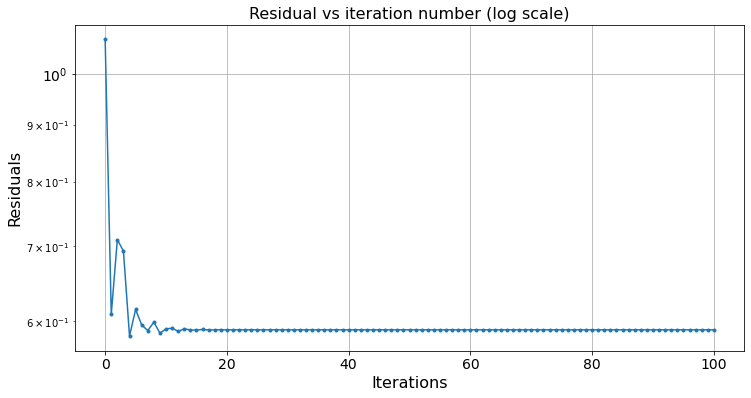

In [34]:
import matplotlib.pyplot as plt

eve = np.random.random(P.shape[0])
iters = 100
eve, eva, res = power_method(P, eve, iters)

plt.figure(figsize=(12,6))
plt.semilogy(res, '.-')
plt.title('Residual vs iteration number (log scale)', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.xlabel('Iterations', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

Let us decompose $x_0$ into a sum of eigenvectors $v_i$ with coefficients $c_i$:

$$ x_0 = c_1 v_1 + \dots + c_5 v_5. $$

Since $v_i$ are eigenvectors, we have

$$
\begin{split}
x_1 &= \frac{Ax_0}{\|Ax_0\|} = \frac{c_1 \lambda_1 v_1 + \dots + c_5 \lambda_5 v_5}{\|c_1 \lambda_1 v_1 + \dots + c_5 \lambda_5 v_5 \|}  \\
&\vdots\\
x_k &= \frac{Ax_{k-1}}{\|Ax_{k-1}\|} = \frac{c_1 \lambda_1^k v_1 + \dots + c_5 \lambda_5^k v_5}{\|c_1 \lambda_1^k v_1 + \dots + c_5 \lambda_5^k v_5 \|}
\end{split}, k \rightarrow \infty
$$

Now we can see, that 

$$
x_k = \frac{c_1}{|c_1|}\left(\frac{\lambda_1}{|\lambda_1|}\right)^k\frac{ v_1 + \frac{c_2}{c_1}(\frac{\lambda_2}{\lambda_1})^k v_2 + \dots + \frac{c_5}{c_1}(\frac{\lambda_5}{\lambda_1})^k v_5}{\left\|v_1 + \frac{c_2}{c_1}(\frac{\lambda_2}{\lambda_1})^k v_2 + \dots + \frac{c_5}{c_1}(\frac{\lambda_5}{\lambda_1})^k v_5\right\|}, k \rightarrow \infty
$$

$\left| \frac{c_1}{|c_1|}\left(\frac{\lambda_1}{|\lambda_1|}\right)^k\right| = 1 = \text{const} $, $\left(\frac{\lambda_2}{\lambda_1}\right)^k = 1 = \text{const}$, and $\left(\frac{\lambda_3}{\lambda_1}\right)^k = (-1)^k$ - just changes its sign. $\left(\frac{\lambda_4}{\lambda_1}\right)^k \to 0$, $\left(\frac{\lambda_5}{\lambda_1}\right)^k \to 0$ 

For $x_k$ we see several terms: 2 constants, one which changes a sign only and 2 going to zero. That's why we do not observe convergence to zero and to partiqular value.

## **Task 2.2.5**

**(2 pts) Consider the same graph, but with additional self loop at node 4 (self loop is an edge that connects a vertex with itself). Plot residuals as in the previous task and discuss the convergence. Now, run the power method with ```num_iter=100``` for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?**

In [35]:
G[4,4] = 1
print(G)

[[0 1 0 0 0]
 [0 0 1 0 0]
 [1 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 1]]


In [36]:
np.linalg.eigvals(pagerank_matrix(G))

array([-0.5+0.5j, -0.5-0.5j,  1. +0.j , -0.5+0.j ,  1. +0.j ])

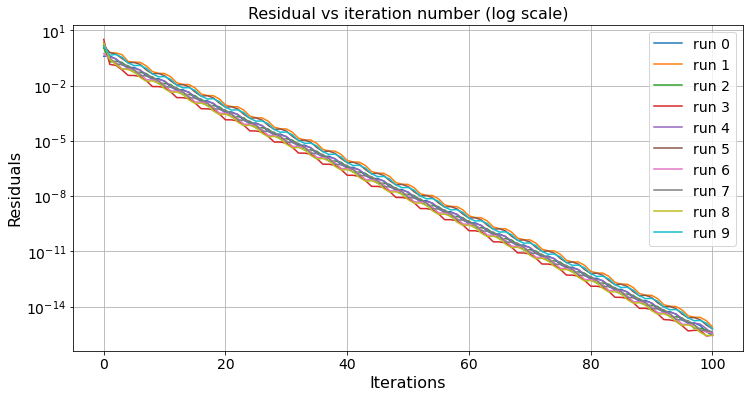

In [37]:
P = pagerank_matrix(G)

plt.figure(figsize=(12,6))

for i in range(10):
    eig_vec = np.random.random(P.shape[0])
    eig_vec, eig_val, res = power_method(P, eig_vec, 100)
    plt.semilogy(res,label='run '+str(i))

plt.title('Residual vs iteration number (log scale)', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.xlabel('Iterations', fontsize = 16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

From the previous task:

$$
x_k = \frac{c_1}{|c_1|}\left(\frac{\lambda_1}{|\lambda_1|}\right)^k\frac{ v_1 + \frac{c_2}{c_1}(\frac{\lambda_2}{\lambda_1})^k v_2 + \dots + \frac{c_5}{c_1}(\frac{\lambda_5}{\lambda_1})^k v_5}{\left\|v_1 + \frac{c_2}{c_1}(\frac{\lambda_2}{\lambda_1})^k v_2 + \dots + \frac{c_5}{c_1}(\frac{\lambda_5}{\lambda_1})^k v_5\right\|}, k \rightarrow \infty
$$

$\left| \frac{c_1}{|c_1|}\left(\frac{\lambda_1}{|\lambda_1|}\right)^k\right| = 1 = \text{const} $, $\left(\frac{\lambda_2}{\lambda_1}\right)^k = 1 = \text{const}$, and $\left(\frac{\lambda_3}{\lambda_1}\right)^k \to 0$, $\left(\frac{\lambda_4}{\lambda_1}\right)^k \to 0$, $\left(\frac{\lambda_5}{\lambda_1}\right)^k \to 0$ 

So, we have:

$$
x_k = \frac{v_1 + \frac{c2}{c1}v_2 }{\|v_1 + \frac{c2}{c1}v_2\|}, k \rightarrow \infty
$$
Using self loop at node 4 we elimainated eigenvalue which was -1, but there are 2 eigenvalues equals to +1.

Resulting vector $x_k$ is linear combination of 1st and 2nd eigenvectors.
It depends on the initial vector $x_0$ because for different trials we have different $\frac{c2}{c1}$ multiplier.

## **Task 2.2.6**

**(2 pts) Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.97$, ```num_iter=100``` and a random initial guess ```x0```.**

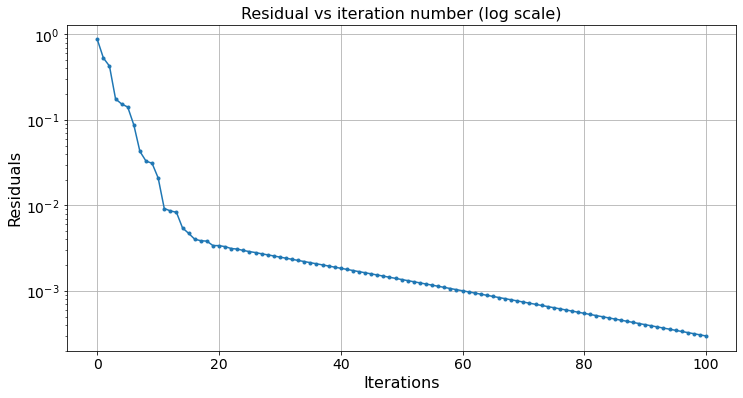

In [38]:
def add_damping(A, dampling_factor = 0.85):
    Ad = dampling_factor*A + (1 - dampling_factor) * np.ones(A.shape) / A.shape[0]
    return Ad

# add damping factor
Pd = add_damping(P, 0.97)

iters = 100 
eve = np.random.random(Pd.shape[0])
eve, eva, res = power_method(Pd, eve,iters)

plt.figure(figsize=(12,6))
plt.semilogy(res, '.-')
plt.title('Residual vs iteration number (log scale)', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.xlabel('Iterations', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

## **Task 2.2.7**

**(5 pts) Find the second largest in the absolute value eigenvalue of the obtained matrix $A_d$. How and why is it connected to the damping factor $d$? What is the convergence rate of the PageRank algorithm when using damping factor?**

In [39]:
eig_vals, eig_vecs = np.linalg.eig(P)
eig_vals_d, eig_vecs_d = np.linalg.eig(Pd)

print('Eigenvalues without damping:')
print(eig_vals[np.argsort(eig_vals)[::-1]],'\n')
print('Eigenvalues with damping:')
print(eig_vals_d[np.argsort(eig_vals_d)[::-1]],'\n')
print('The second largest in the absolute value eigenvalue is ',0.97)

Eigenvalues without damping:
[ 1. +0.j   1. +0.j  -0.5+0.5j -0.5+0.j  -0.5-0.5j] 

Eigenvalues with damping:
[ 1.   +0.j     0.97 +0.j    -0.485+0.j    -0.485+0.485j -0.485-0.485j] 

The second largest in the absolute value eigenvalue is  0.97


The first (main) eigenvalue is the same. But all the other eigenvalues are proportional to damping factor $d$. 

Multiplication of the original matrix to dampling factor leads to multiplication for all the eigenvalues of the original matrix, but term $\frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix}$ results in recovering the main eigenvalue to the initial value.

Convergence rate in this case in case of damping factor usage is $q^k$, where $q = \left|\frac{d\lambda_{2}}{\lambda_{1}}\right| < 1$ and $\lambda_1>\lambda_2\geq\dots\geq \lambda_n$.

---

## **Task 2.2.8**

**(2 pts) Implement fast matrix-vector product for $A_d$ as a function ```pagerank_matvec(A, d, x)```, which takes a PageRank matrix $A$ (in sparse format, e.g., ```csr_matrix```), damping factor $d$ and a vector $x$ as an input and returns $A_dx$ as an output.**

In [40]:
# INPUT:  A - np.ndarray (2D), d - float (from 0.0 to 1.0), x - np.ndarray (1D, size of A.shape[0/1])
# OUTPUT: y - np.ndarray (1D, size of x)
def pagerank_matvec(A, d, x): # 2 pts
    # enter your code here
    ones = np.ones(x.shape[0])
    y = d*A @ x + (1 - d) * ones * np.sum(x) / A.shape[0]
    return y

## **Task 2.2.9**

**(1 pts) Generate a random adjacency matrix of size $10000 \times 10000$ with only 100 non-zero elements and compare ```pagerank_matvec``` performance with direct evaluation of $A_dx$.**

In [41]:
# matrix size
n = 10000

# elements density
density = 100/(10000**2)

# generate sparse matrix
A = scipy.sparse.random(n, n, density=density)

# take random vector
x = np.random.random(n)

t1 = %timeit -n 3 -o -q pagerank_matvec(A,0.97, x)
t2 = %timeit -n 3 -o -q add_damping(A,0.97) @ x

print(t1,'\n')
print(t2,'\n')
print('Speedup: ',t2.best/t1.best, ' times')

98.4 µs ± 20.4 µs per loop (mean ± std. dev. of 7 runs, 3 loops each) 

376 ms ± 4.36 ms per loop (mean ± std. dev. of 7 runs, 3 loops each) 

Speedup:  4145.839455533207  times


#### DBLP: computer science bibliography

Download the dataset from [here](https://goo.gl/oZVxEa), unzip it and put `dblp_authors.npz`  and `dblp_graph.npz` in the same folder with this notebook. Each value (author name) from `dblp_authors.npz` corresponds to the row/column of the matrix from `dblp_graph.npz`. Value at row `i` and column `j` of the matrix from `dblp_graph.npz` corresponds to the number of times author `i` cited papers of the author `j`. Let us now find the most significant scientists according to PageRank model over DBLP data.

* (4 pts) Load the weighted adjacency matrix and the authors list into Python using ```load_dblp(...)``` function. Print its density (fraction of nonzero elements). Find top-10 most cited authors from the weighted adjacency matrix. Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). Obtain the PageRank matrix $A$ from the adjacency matrix and verify that it is stochastic.
 
 
* (1 pts) In order to provide ```pagerank_matvec``` to your ```power_method``` (without rewriting it) for fast calculation of $A_dx$, you can create a ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Calling ```L@x``` or ```L.dot(x)``` will result in calculation of ```pagerank_matvec(A, d, x)``` and, thus, you can plug $L$ instead of the matrix $A$ in the ```power_method``` directly. **Note:** though in the previous subtask graph was very small (so you could disparage fast matvec implementation), here it is very large (but sparse), so that direct evaluation of $A_dx$ will require $\sim 10^{12}$ matrix elements to store - good luck with that (^_<).


* (2 pts) Run the power method starting from the vector of all ones and plot residuals $\|A_dx_k - \lambda_k x_k\|_2$  as a function of $k$ for $d=0.85$.


* (1 pts) Print names of the top-10 authors according to PageRank over DBLP when $d=0.85$. Comment on your findings.

## **Task 2.2.10**

**(4 pts) Load the weighted adjacency matrix and the authors list into Python using ```load_dblp(...)``` function. Print its density (fraction of nonzero elements). Find top-10 most cited authors from the weighted adjacency matrix. Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). Obtain the PageRank matrix $A$ from the adjacency matrix and verify that it is stochastic.**

In [42]:
# # downloading
# !gdown --id 1a77VOi_XAOXQLGEsVauBHU5WpnzyS57-
# !unzip dblp.zip

In [43]:
from scipy.sparse import load_npz
import numpy as np

def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors

G, authors = load_dblp('dblp_authors.npz', 'dblp_graph.npz')

In [44]:
print("N_nonzero      ", G.getnnz())
print("N_All_elements ",G.shape[0]*G.shape[1])
print("Density        ",(G.getnnz()/G.shape[0]/G.shape[1]))

N_nonzero       140388901
N_All_elements  3120688303209
Density         4.498651815230578e-05


In [45]:
all_cited = np.asarray(np.sum(G,axis=0)).flatten()

most_cited = all_cited.argsort()[-10:][::-1]

for index in most_cited:
  print('Name: ',authors[index],';Citations:', int(all_cited[index]))

Name:  Scott Shenker ;Citations: 119853
Name:  Andrew Zisserman ;Citations: 118558
Name:  Hari Balakrishnan ;Citations: 117253
Name:  Jiawei Han ;Citations: 116708
Name:  Anil K. Jain ;Citations: 113874
Name:  Cordelia Schmid ;Citations: 102996
Name:  Jitendra Malik ;Citations: 101657
Name:  Ion Stoica ;Citations: 98017
Name:  David E. Culler ;Citations: 95762
Name:  David G. Lowe ;Citations: 93678


In [46]:
P = pagerank_matrix(G)

A = np.squeeze(np.asarray(P.sum(0)))

# we also have to check sum equal to 0 to consider dangling node problem
print('Matrix is stochastic: ', (np.isclose(A,1)+np.isclose(A,0)).all())

Matrix is stochastic:  True


## **Task 2.2.11**

**(1 pts) In order to provide ```pagerank_matvec``` to your ```power_method``` (without rewriting it) for fast calculation of $A_dx$, you can create a ```LinearOperator```:```python L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```Calling ```L@x``` or ```L.dot(x)``` will result in calculation of ```pagerank_matvec(A, d, x)``` and, thus, you can plug $L$ instead of the matrix $A$ in the ```power_method``` directly. Note: though in the previous subtask graph was very small (so you could disparage fast matvec implementation), here it is very large (but sparse), so that direct evaluation of $A_dx$ will require $\sim 10^{12}$ matrix elements to store - good luck with that (^_<).**

In [47]:
import scipy.sparse.linalg

L = scipy.sparse.linalg.LinearOperator(P.shape, matvec=lambda x, A=P, d=0.85: pagerank_matvec(A, d, x))

## **Task 2.2.12**

**(2 pts) Run the power method starting from the vector of all ones and plot residuals $\|A_dx_k - \lambda_k x_k\|_2$  as a function of $k$ for $d=0.85$.**

In [48]:
num_iter = 100
vector_ones = np.ones(P.shape[0])

x, l, res = power_method(L, vector_ones, num_iter)

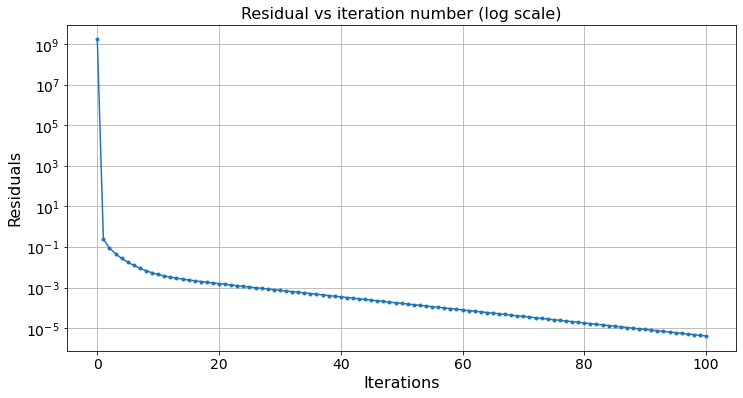

In [49]:
plt.figure(figsize=(12,6))
plt.semilogy(res, '.-')
plt.title('Residual vs iteration number (log scale)', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.xlabel('Iterations', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

## **Task 2.2.13**

**(1 pts) Print names of the top-10 authors according to PageRank over DBLP when $d=0.85$. Comment on your findings.**

In [50]:
# Your code is here
most_cited_dblp = x.argsort()[-10:][::-1]

for index in most_cited_dblp:
    print('Name: ',authors[index])

Name:  Wei Wang
Name:  Yang Liu
Name:  Wei Zhang
Name:  Lajos Hanzo
Name:  Leonard Barolli
Name:  Lei Zhang
Name:  Jun Zhang
Name:  Wei Li
Name:  Jun Wang
Name:  Lei Wang


**In accordance with this info https://dblp.org/statistics/prolific1.html I can conclude that this approach works good since most of names are in the list from the link.**

## Problem 3. QR algorithm (33 pts)

* Implement QR-algorithm without shifts. Prototype of the function is given below

In [51]:
import numpy as np 
import scipy
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.sparse import diags 
from tqdm import tqdm

In [52]:
# INPUT: 
# A_init - square matrix, 
# num_iter - number of iterations for QR algorithm
# OUTPUT: 
# Ak - transformed matrix A_init given by QR algorithm, 
# convergence - numpy array of shape (num_iter, ), 
# where we store the maximal number from the Chebyshev norm 
# of triangular part of the Ak for every iteration
def qr_algorithm(A_init, num_iter): # 3 pts
    # enter your code here
    # set inital matrix
    Ak = A_init
    # convergence list
    convergence = []                
    for _ in range(num_iter):
        # QR
        Q,R = scipy.linalg.qr(Ak)
        # Chebyshev norm from lower subdiagonal matrix
        convergence.append(np.amax(np.abs(np.tril(Ak, k=-1))))
        # inverse order multiplication
        Ak = R @ Q
    return Ak, convergence

#### Symmetric case (3 pts)
- Create symmetric tridiagonal $11 \times 11$ matrix with elements $-1, 2, -1$ on sub-, main- and upper diagonal respectively without using loops.
- Run $400$ iterations of the QR algorithm for this matrix.
- Plot the output matrix with function ```plt.spy(Ak, precision=1e-7)```.
- Plot convergence of QR-algorithm.

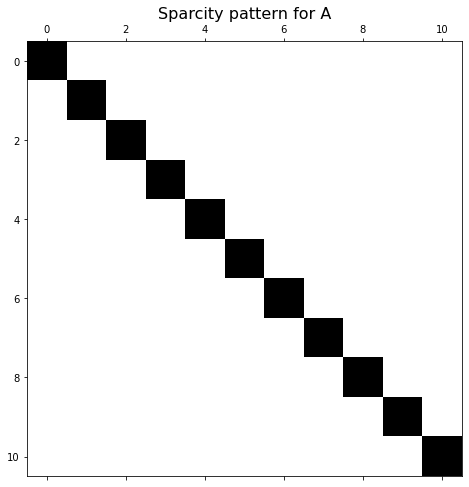

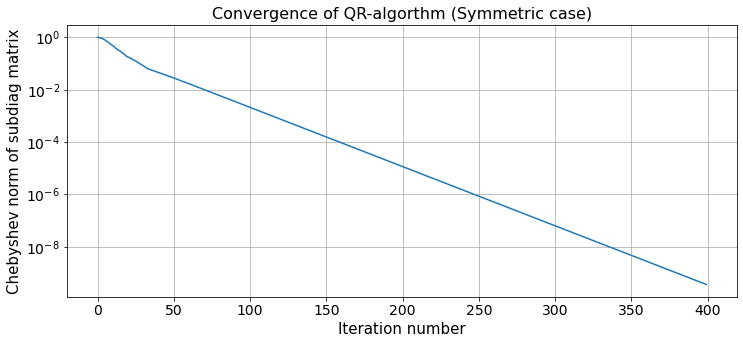

In [53]:
# Your solution is here
n = 11
n_iter = 400

# create 3-diag symmetric matrix 
A = diags([-1, 2, -1], [-1, 0, 1], shape=(n, n)).toarray()

# run QR algorithm
Ak, convergence = qr_algorithm(A,n_iter)

# plot output matrix
plt.figure(figsize = (8,8))
plt.title('Sparcity pattern for A', fontsize = 16)
plt.spy(Ak, precision=1e-7)

# plot convergence
plt.figure(figsize = (12,5))
plt.title('Convergence of QR-algorthm (Symmetric case)', fontsize = 16)
plt.plot(convergence)
plt.yscale('log')
plt.xlabel('Iteration number', fontsize = 15)
plt.ylabel('Chebyshev norm of subdiag matrix', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

#### Nonsymmetric case (5 pts)

- Create nonsymmetric tridiagonal $11 \times 11$ matrix with elements $5, 3, -2$ on sub-, main- and upper diagonal respectively without using loops.
- Run $250$ iterations of the QR algorithm for this matrix.
- Plot the result matrix with function ```plt.spy(Ak, precision=1e-7)```. Is this matrix lower triangular? How does this correspond to the claim about convergence of the QR algorithm?

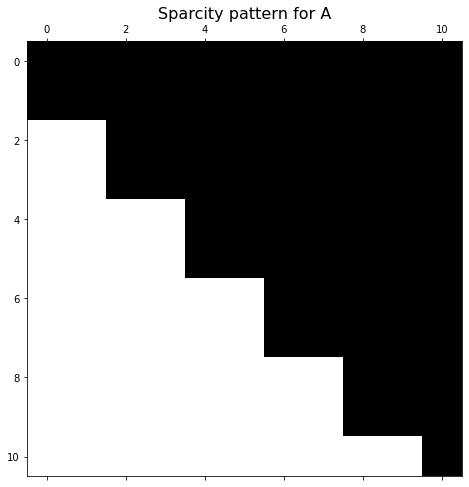

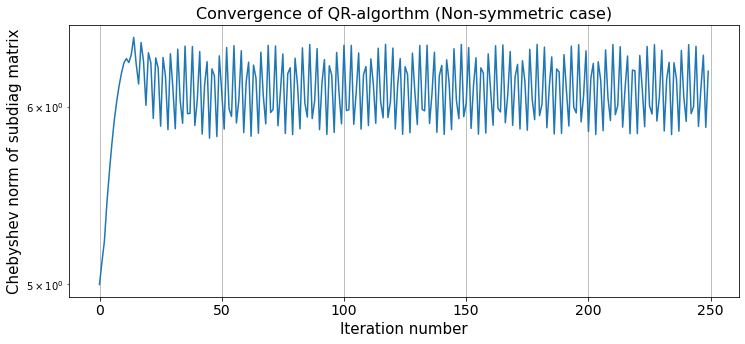

In [54]:
# Your solution is here
n = 11
n_iter = 250

# create 3-diag symmetric matrix 
A = diags([5, 3, -2], [-1, 0, 1], shape=(n, n)).toarray()

# run QR algorithm
Ak, convergence = qr_algorithm(A,n_iter)

# plot output matrix
plt.figure(figsize = (8,8))
plt.title('Sparcity pattern for A', fontsize = 16)
plt.spy(Ak, precision=1e-7)

# plot convergence
plt.figure(figsize = (12,5))
plt.title('Convergence of QR-algorthm (Non-symmetric case)', fontsize = 16)
plt.plot(convergence)
plt.yscale('log')
plt.xlabel('Iteration number', fontsize = 15)
plt.ylabel('Chebyshev norm of subdiag matrix', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

### In this case the matrix is not triangular matrix, because it is nonsymmetric. This matrix has complex eigenvalues.

### QR algorithms with Rayleigh Quotient shift (10 pts)

In the lectures the Rayleigh Quotient shift was introduced to speed up convergence of power method. Here we ask you to generalize this approach to construct the shifts in QR algorithm.

- How to compute the Rayleigh Quotient shift in QR algorithm fast? Provide formulas and explanations how they can be simplified.
- Implement explicit QR algorithm with Rayleigh Quotient shift. Please do not worry about implicit orthogonalization, we want to compare convergence only in terms of iterations.
- Test your implementation in the symmetric case. Plot the convergence of QR algorithm with and without shift. Choose the dimension $n \sim 100 $ for more representative results. 
- How the convergence of the shifted algorithm compares to the simple QR? Why? 

Rayleigh shift for QR-algorithm can be calculated as follows:
$$
\mu^{(k)} \stackrel{\mathrm{1}}{=} \frac{(q_m^{(k)})^TAq_m^{(k)}}{(q_m^{(k)})^Tq_m^{(k)}} \stackrel{\mathrm{2}}{=} (q_m^{(k)})^TAq_m^{(k)} \stackrel{\mathrm{3}}{=} e^T_m(Q^{k})^TAQ^{(k)}e_m \stackrel{\mathrm{4}}{=} e^T_mA^{(k)}e_m=A_{mm}^{(k)}
, \text{where}$$
$q_m^{(k)}$ is the last column of $Q^{(k)} $ matrix

1. Definition.
2. $Q^{(k)}$ is orthogonal: $(q_m^{(k)})^Tq_m^{(k)} = 1$
3. $ (Q^{k})^TAQ^{(k)} = A^{(k)}, e_m$ - vector-column with 1 in the last position.
4. $ (Q^{k})^TAQ^{(k)} = A^{(k)}$

Rayleigh shift in QR-algorithm can be chosen as the right bottom element of the matrix $A$.

In [55]:
def qr_algorithm_reileigh(A_init, num_iter):
    # enter your code here
    # set inital matrix
    Ak = A_init
    # convergence list
    convergence = []
    # shift
    mu = 0
    I = np.eye(Ak.shape[0])
    for _ in range(num_iter):
        # shited QR
        Q,R = scipy.linalg.qr(Ak - mu*I)
        # Chebyshev norm
        convergence.append(np.amax(np.abs(np.tril(Ak, k=-1))))
        # inverse order multiplication and shift
        Ak = R @ Q + mu*I
        # set shift as the bottom right element 
        mu = Ak[-1,-1]
    return Ak, convergence

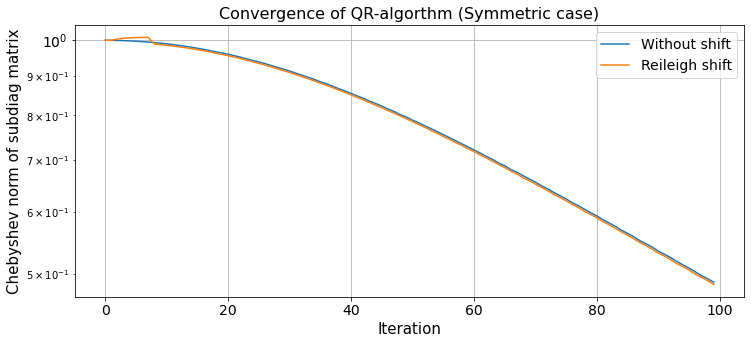

In [56]:
n = 100
n_iter = 100
# Create symmetric matrix
A = diags([-1, 2, -1], [-1, 0, 1], shape=(n, n)).toarray()

# QR algorithm
Ak, conv = qr_algorithm(A,n_iter)
# Raleigh shifted QR algorithm
Ak_shifted, conv_shifted = qr_algorithm_reileigh(A,n_iter)

plt.figure(figsize = (12,5))
plt.title('Convergence of QR-algorthm (Symmetric case)', fontsize = 16)
plt.plot(conv, label = 'Without shift')
plt.plot(conv_shifted, label = 'Reileigh shift')
plt.yscale('log')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Chebyshev norm of subdiag matrix', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()

### Shifted algorithm converges better because it increases the gap between eigenvalues.

- Try QR with Rayleigh Quotient shift for a simple matrix $A = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}$. Does anything change from iteration to iteration? Does shift affect convergence here? Why?

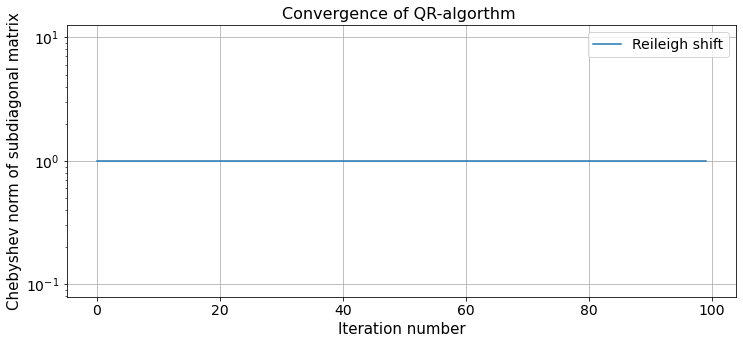

In [57]:
# Your solution is here
A = np.array([[0,1],
              [1,0]])
n_iter = 100

Ak_shifted, conv_shifted = qr_algorithm_reileigh(A,n_iter)

plt.figure(figsize = (12,5))
plt.title('Convergence of QR-algorthm ', fontsize = 16)
plt.plot(conv_shifted, label = 'Reileigh shift')
plt.yscale('log')
plt.xlabel('Iteration number', fontsize = 15)
plt.ylabel('Chebyshev norm of subdiagonal matrix', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()

### In this matrix $A = QR = RQ$. It does not change after several iterations of QR algorithm. And the Rayleigh shift help in this case because $A_{mm} = 0$ for all iterations of the algorithm. That's why it does not work.  

### QR with Wilkinson shift  (15 pts)

To solve the problem that appears in the last example, we can use the Wilkinson shift:

$$\mu = a_m - \frac {sign(\delta) b^2_{m-1}} {(|\delta| + \sqrt{\delta^2 + b^2_{m-1}} )},$$

where $\delta = \frac{(a_{m-1} - a_m)}{2}$. If $\delta = 0$, then instead of $sign(\delta)$ you have to choose $1$ or $-1$ arbitrary.
The numbers $a_m, b_{m-1}, a_{m-1}$ are taken from matrix $B$:

$$
    B = 
    \begin{bmatrix} 
     a_{m-1} & b_{m-1} \\ 
     b_{m-1} & a_m \\ 
    \end{bmatrix},
$$  
which is a lower right bottom submatrix of $A^{(k)}$. Here $k$ is an iteration counter in QR algorithm.

- Compare convergence in the symmetric cases: 
    - distinctive eigenvalues
    - two coincident eigenvalues
    - maximum and minimum eigenvalues with the same absolute value
Choose the dimension $n \sim 100 $ for more representative results.
What do you observe? 

In [58]:
def qr_algorithm_wilkinson(A_init, num_iter):
    # enter your code here
    def wilkinson_shift(B):
        delta = (B[0,0] - B[1,1])/2   
        # if delta is close to zero, then choose random sign
        if np.isclose(delta, 0, atol=1e-12):
            delta = np.random.choice([-1,1])
        return B[1,1] - (np.sign(delta)*B[0,1]**2)/(np.abs(delta) + np.sqrt(delta**2+B[0,1]**2))
     
    # set inital matrix
    Ak = A_init
    # convergence list
    convergence = []
    n = Ak.shape[1]
    I = np.eye(n)
    for _ in range(num_iter):
        # calculate shift value
        mu = wilkinson_shift(Ak[-2:, -2:])
        # QR and shift
        Q,R = scipy.linalg.qr(Ak - mu*I)
        # Chebyshev norm
        convergence.append(np.amax(np.abs(np.tril(Ak, k=-1))))
        # inverse order multiplication and shift
        Ak = R@Q + mu*I
    return Ak, convergence

In [59]:
def gen_matrix(size,option):
    M = np.random.rand(size,size)
    U,_,_ = np.linalg.svd(M)
    if option == 'distinctive_eigenvalues':
        eigvals = 1/np.arange(1,size+1)**0.25
    elif option == 'coincides_eigenvalues':
        eigvals = 1/np.concatenate((np.array([1]), np.arange(1, size)**0.25))
    elif option == 'opposite_sign_eigenvalues':
        eigvals = 1/np.concatenate((np.arange(1,size)**0.25, -np.array([1])))
    A = np.diag(eigvals)
    return U @ A @ U.T

M = gen_matrix(5,option='distinctive_eigenvalues')
print(np.linalg.eigvalsh(M))
M = gen_matrix(5,option='coincides_eigenvalues')
print(np.linalg.eigvalsh(M))
M = gen_matrix(5,option='opposite_sign_eigenvalues')
print(np.linalg.eigvals(M))

[0.6687403  0.70710678 0.75983569 0.84089642 1.        ]
[0.70710678 0.75983569 0.84089642 1.         1.        ]
[-1.          1.          0.70710678  0.75983569  0.84089642]


In [60]:
def calculate_convergence(n,n_iter,ATTEMPTS,case):
    convergence_qr_s = np.zeros((ATTEMPTS, n_iter))
    convergence_qr_rs = np.zeros((ATTEMPTS, n_iter))
    convergence_qr_ws = np.zeros((ATTEMPTS, n_iter))

    # repeat ATTEMPTS times
    for attempt in tqdm(range(ATTEMPTS)):
        # create matrix with distinctive eigenvalues
        # distinctive | coincides | dif_abs
        A = gen_matrix(size=n,option=case)

        # пуе it Hessinberg form аor better convergence and faster calculation
        A = scipy.linalg.hessenberg(A)
        # regular QR algorithm
        Ak_s, convergence_s = qr_algorithm(A,n_iter)
        # QR algorithm + Reileigh shift
        Ak_rs, convergence_rs = qr_algorithm_reileigh(A,n_iter)
        # QR algorithm + Wilkinson shift
        Ak_ws, convergence_ws = qr_algorithm_wilkinson(A,n_iter)

        # save current values
        convergence_qr_s[attempt,:] = convergence_s
        convergence_qr_rs[attempt,:] = convergence_rs
        convergence_qr_ws[attempt,:] = convergence_ws

    # Plot meaned over all experiments graphs
    plt.figure(figsize = (16,6))
    plt.title('QR-algorthms convergence: '+case, fontsize=16)
    plt.plot(np.mean(convergence_qr_s,axis = 0), label='Without shift')
    plt.plot(np.mean(convergence_qr_rs,axis = 0), label='Reileigh shift')
    plt.plot(np.mean(convergence_qr_ws,axis = 0), label='Wilkinson shift')
    plt.xlabel('Iteration number', fontsize= 16)
    plt.ylabel('Chebyshev norm of subdiagonal matrix', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.yscale('log')
    plt.legend(fontsize=14)
    plt.grid()

n = 100
n_iter = 200    
ATTEMPTS = 100

100%|██████████| 100/100 [00:41<00:00,  2.40it/s]


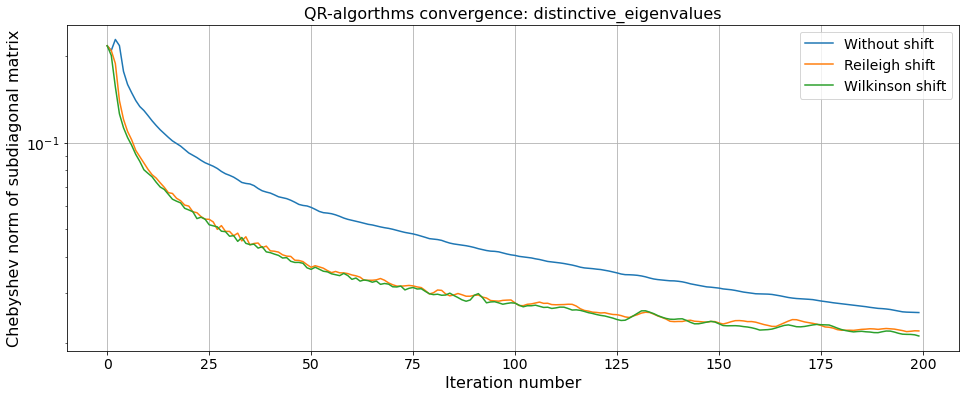

In [61]:
case = 'distinctive_eigenvalues'
calculate_convergence(n,n_iter,ATTEMPTS,case)

### It can be seen that shifted algorithms converges a bit faster.

100%|██████████| 100/100 [00:45<00:00,  2.21it/s]


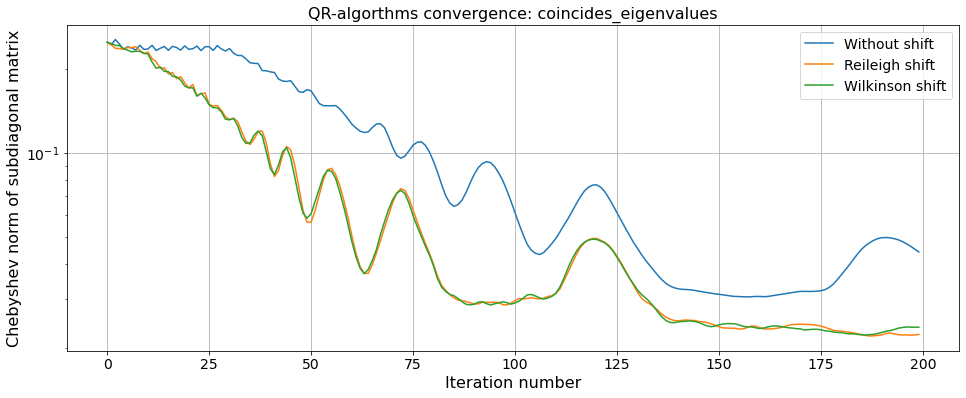

In [62]:
case = 'coincides_eigenvalues'
calculate_convergence(n,n_iter,ATTEMPTS,case)

### If we have 2 eigenvalues coincides then algorithms converges with oscilations.

100%|██████████| 100/100 [00:44<00:00,  2.22it/s]


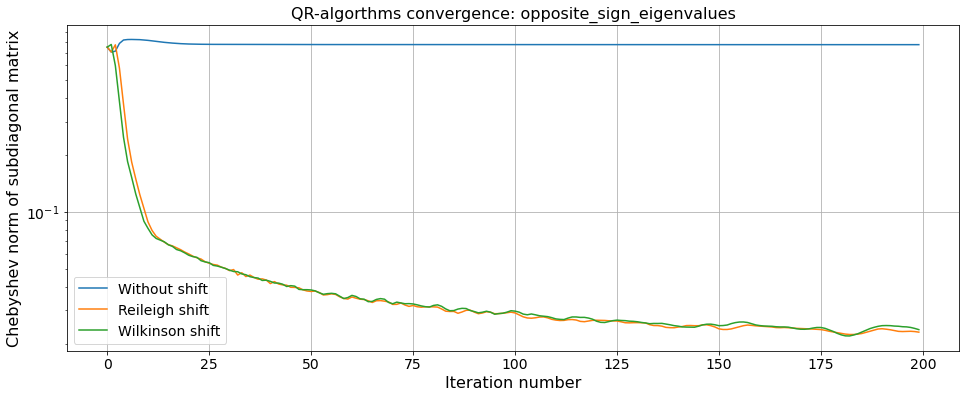

In [63]:
case = 'opposite_sign_eigenvalues'
calculate_convergence(n,n_iter,ATTEMPTS,case)

### But with 2 opposit sign eigenvalues converence is worse in general (in comparison with 2 previous cases). Moreover, algorithm without shifts does not converge.

## Problem 4. (Movie Recommender system) 15 pts

Imagine the world without NLA where you have free evenings and you can watch movies!  
But it is always hard to choose a movie to watch. 
In this problem we suggest you to build your own movie recommender system based on SVD decomposition, so you can combine two perfect things: Numerical Linear Algebra and cinematography!

In order to build recommender system you need data. 
Here you are https://grouplens.org/datasets/movielens/1m/

Usually all recommender systems may be devided into two groups

#### Collaborative filtering. 

This approach is based on user-item interaction.
It has one important assumption: user who has liked an item in the past will also likes the same in the future. Suppose the user A likes the films about vampires. 
He is Twilight saga fan and he has watched the film "What we do in the shadows" and liked it or unliked it, in other words he evaluated it somehow. And suppose another user B, who has the similair behavior to the first user (he is also Twilight saga fan). And the chance, that he will estimate "What we do in the shadows" in the same way that user A did, is huge. So, the purpose of the collaborative filtering is to predict a user's behavior based on behavior of the simular users.

#### Content based filtering.

Collaborative filtering has some essential flaws. The main one is called "cold start". "Cold start" happens when the new user comes and he has not react anyhow to the items. So we do not know his past behavior and we do not know what to advise. Here content based filtering helps. Often resources gather some extra info about users and items before a user comes down to utilising the resource. So, for example we would know that user likes horror movies before he watched anything on the resource.


- In this task you will implement Collaborative filtering based on SVD (we will use the function from the proper package and check if the result recommender system advices the similar movies)

1) (1 pts)  Explore the data. Construct the interaction matrix $M$ of size $m \times n$ which contains the information of how a certain user rated a certain film. 

2) (5 pts)  Compute SVD of this matrix. Remeber that matrix $M$ is sparse (one user can hardly watch all the movies) so the good choice would be to use method from ```scipy.sparse.linalg``` package

$$ M = USV^{\top}, $$

where $U$ is a $m \times r $ orthogonal matrix with left singular vectors, which represents the relationship between users and latent factors, $S$ is a $r \times r $ diagonal matrix, which describes the strength of each latent factor and $V^\top$ is a $r \times n$ matrix with right singular vectors, which represent the embeddings of  items (movies in our case) in latent space.
Describe any simple heuristic to choose appropriate value for $r$ and explain why do you expect that it will work.


## **Task 4.1**

**1) (1 pts)  Explore the data. Construct the interaction matrix $M$ of size $m \times n$ which contains the information of how a certain user rated a certain film.**

In [64]:
# Importing Libraries
import numpy as np
import pandas as pd

# Read the dataset
movies = pd.read_table("movies.dat",names=['MovieID','Title','Genres'],encoding='latin-1',delimiter='::')
ratings = pd.read_table("ratings.dat",names=['UserID','MovieID','Rating','Timestamp'],encoding='latin-1',delimiter='::')
users = pd.read_table("users.dat",names=['UserID','Gender','Age','Occupation','Zip-code'],encoding='latin-1',delimiter='::')

# Create the interaction matrix
m = len(users)
n = len(movies)
l = len(ratings)
print('The number of movies:  ',n)
print('The number of ratings: ',l)
print('The number of users:   ',m)
print('              Density: ',np.round(l/(m*n),3))

# create empty matrix
M = np.zeros((m,n))

# extract IDs for movies
mov_ids = np.array(movies['MovieID'])
# extract IDs for users
ue_ids = np.array(users['UserID'])
for i in range(l):
    # get current user id and Movie ID
    ue_id,mov_id = ratings['UserID'][i],ratings['MovieID'][i]
    # convert ID to index
    ue_idx = np.argmax(ue_ids == ue_id)
    mov_idx = np.argmax(mov_ids == mov_id)
    # insert corresponding rating into M
    M[ue_idx,mov_idx] = ratings['Rating'][i]

# # Normalize the matrix

# # normalize along movie axis
# sum_along_movies = M.sum(axis=1)
# print('Zero sums:',np.sum(sum_along_movies == 0))
# # normalize
# M_norm_m = M / sum_along_movies.reshape(m,1)
# # print(M_norm_m.sum(axis=1),np.sum(M_norm_m.sum(axis=1) == 0))

# # normalize along user axis
# sum_along_users = M.sum(axis=0)
# print('Zero sums:',np.sum(sum_along_users == 0))
# # replace 0 sums with 1 to avoid zero division error
# sum_along_users[sum_along_users == 0] = 1
# # normalize
# M_norm_n = M / sum_along_users.reshape(1,n)
# # print(M_norm_n.sum(axis=0),np.sum(M_norm_n.sum(axis=0) == 0))

M_norm = M # M_norm_m

# additional functions: 
# find movie using its index in movies data frame
def movie_by_index(idx):
    title, genre = movies['Title'][idx],movies['Genres'][idx]
    return title,genre
# find movie using its id in movies data frame
def movie_by_id(id_,mov_ids):
    idx = np.argmax(mov_ids == id_)
    title, genre = movies['Title'][idx],movies['Genres'][idx]
    return title,genre

/home/stas/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


The number of movies:   3883
The number of ratings:  1000209
The number of users:    6040
              Density:  0.043


In [65]:
k=10
pd.concat((movies.head(k),ratings.head(k),users.head(k)),axis=1)

,MovieID,Title,Genres,UserID,MovieID,Rating,Timestamp,UserID,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1,F,1,10,48067
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2,M,56,16,70072
2,3,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3,M,25,15,55117
3,4,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4,M,45,7,02460
4,5,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5,M,25,20,55455
5,6,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6,F,50,9,55117
6,7,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7,M,35,1,06810
7,8,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8,M,25,12,11413
8,9,Sudden Death (1995),Action,1,594,4,978302268,9,M,25,17,61614
9,10,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10,F,35,1,95370


In [66]:
movie_by_index(2),movie_by_id(1,mov_ids)

(('Grumpier Old Men (1995)', 'Comedy|Romance'),
 ('Toy Story (1995)', "Animation|Children's|Comedy"))

### To select $r$ we can make regular SVD for the whole matrix and then to find singular values responsible for 90% of information in the latent space. To do it faster, we can find this $r$ for smaller random submatrix of $M$ and then multiply in by coefficient of proportionality.

In [67]:
# select a random submatrix of size m//p,n//p
p = 10
u = np.random.choice(np.arange(m),m // p)
f = np.random.choice(np.arange(n),n // p)

# calculate SVD
_,s,_ = np.linalg.svd(M_norm[u][:,f])

# find the most important singular values
singular_sum = np.sum(s)
r = 0  # approximation rank (the most imortant latent factors)
summa = 0
# stop if we have achieved 75% approximation
while np.abs(summa - singular_sum)/singular_sum > 0.25:
    summa = np.sum(np.sum(s[0:r]))
    r += 1
r = r*p
print(r)

1110


## **Task 4.2**

**2) (5 pts)  Compute SVD of this matrix. Remeber that matrix $M$ is sparse (one user can hardly watch all the movies) so the good choice would be to use method from ```scipy.sparse.linalg``` package**

In [68]:
# Compute Singular Value Decomposition of interaction matrix. You can use built-in functions

# U,S,V = svd(M) # Update this line, it is just example
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds

# create sparse matrix
M_sparse = csc_matrix(M_norm, dtype=float)
# compute its SVD
U,S,Vt = svds(M_sparse,k=r)

## **Task 4.3**

3) (2 pts) In order to get weighted item-latent factors, we can multiply $S$ and $V^{T}$. Please, remember that $S$ is diagonal and multiply them efficiently.

In [69]:
# Your solutuion is here
S = S[::-1]
Vt = Vt[::-1,:]
# calculate approximation (element-wise)
# inefficient multiplication:
svt = np.diag(S[0:r]) @ Vt[0:r,:]
# efficient multiplication:
SVt = S.reshape(-1,1)[0:r,:] * Vt[0:r,:]

# compare results:
print('All results are equal to each other:',(svt == SVt).all())

All results are equal to each other: True


## **Task 4.4**

Now we have vectors that represent our item space. In other words we have $N$ movies and $N$ vectors which describe each movie, a.k.a. embeddings. 
In order to know if two movies are similar or not we need just to check if the corresponding vectors are similair or not. How we can do this?

4) (2 pts)  Implement the cosine metric. If the cosine metric between two vectors equals to $1$ both vectors are collinear, if $0$ vectors are orthogonal, as a result corresponding movies are completely different.

$$
cosine(u,v) = \frac{u^{\top}v}{\|u\|_2\|v\|_2}
$$

In [70]:
# Your solutuion is here
# cosine similarity function
def cossim(u,v):
    cossim = (u.T @ v)/np.linalg.norm(u,2)/np.linalg.norm(v,2)
    return cossim

# test it for different vectors
print(cossim(np.array([1,2,1]),np.array([-1,-2,-1])))
print(cossim(np.array([1,2,1]),np.array([-1,1,-1])))
print(cossim(np.array([1,2,1]),np.array([1,2,1])))
print(cossim(np.array([1,2,1]),np.array([1,3,1])))
cossim(SVt[:,0],SVt[:,1])

-1.0000000000000002
0.0
1.0000000000000002
0.984731927834662


0.3976506643351239

## **Task 4.5**

5) (5 pts) Check your result. Implement the fuction, which finds and prints $k$ similar movies to the one you have chosen

In [71]:
# Your solutuion is here
def select_films(selected_film_idx,SVt,k=10):
    # k - the number of films to be selected
    
    # dict for selected films and its scores
    selected_idxs = {}
    # total number of films
    films_number = SVt.shape[1]
    scores = []
    # while have not chosen k films
    for idx in range(films_number):
        sim = cossim(SVt[:,selected_film_idx],SVt[:,idx])
        scores.append(sim)
    # sort s cores and rearrange in descending order
    scores_s = sorted(scores)[-k-1:-1][::-1]
    for item in scores_s:
        # find film index
        idx  = np.argmax(scores == item)
        # add data to the dictionary
        selected_idxs[idx] = item

    # show data about chosen film
    chosen_film,genre = movie_by_index(selected_film_idx)
    print('\nThere are',k,'films similar to',chosen_film,'. Its genre is',genre,'\n')
    # for output results
    data = {'Film name': [],'Film index': [], 'Genre': [], 'Similarity': []}
    for idx,sim_score in zip(selected_idxs.keys(),selected_idxs.values()):
        film_name,genre = movie_by_index(idx)
        # fill table
        data['Film name'].append(film_name)
        data['Film index'].append(idx)
        data['Genre'].append(genre)
        data['Similarity'].append(np.round(sim_score,3))
    df = pd.DataFrame(data)
    df = df.style.set_properties(**{'text-align': 'left'})
    return df

In [72]:
k = 10
selected_film_idx = 0
select_films(selected_film_idx=selected_film_idx,SVt=SVt,k=k)


There are 10 films similar to Toy Story (1995) . Its genre is Animation|Children's|Comedy 



,Film name,Film index,Genre,Similarity
0,Toy Story 2 (1999),3045,Animation|Children's|Comedy,0.634000
1,Groundhog Day (1993),1245,Comedy|Romance,0.611000
2,Aladdin (1992),584,Animation|Children's|Comedy|Musical,0.607000
3,"Bug's Life, A (1998)",2286,Animation|Children's|Comedy,0.580000
4,Back to the Future (1985),1250,Comedy|Sci-Fi,0.571000
5,Babe (1995),33,Children's|Comedy|Drama,0.564000
6,Star Wars: Episode V - The Empire Strikes Back (1980),1178,Action|Adventure|Drama|Sci-Fi|War,0.553000
7,Men in Black (1997),1539,Action|Adventure|Comedy|Sci-Fi,0.553000
8,Forrest Gump (1994),352,Comedy|Romance|War,0.551000
9,"Matrix, The (1999)",2502,Action|Sci-Fi|Thriller,0.551000


In [73]:
selected_film_idx = 3369
select_films(selected_film_idx=selected_film_idx,SVt=SVt,k=k)


There are 10 films similar to Teenage Mutant Ninja Turtles (1990) . Its genre is Action|Children's|Fantasy 



,Film name,Film index,Genre,Similarity
0,Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991),3370,Action|Children's|Fantasy,0.742000
1,Teenage Mutant Ninja Turtles III (1993),3371,Action|Children's|Fantasy,0.663000
2,Mortal Kombat (1995),43,Action|Adventure,0.519000
3,Hook (1991),3420,Adventure|Fantasy,0.506000
4,Willow (1988),2124,Action|Adventure|Fantasy,0.497000
5,Jumanji (1995),1,Adventure|Children's|Fantasy,0.481000
6,Judge Dredd (1995),171,Action|Adventure|Sci-Fi,0.464000
7,"Honey, I Shrunk the Kids (1989)",1985,Adventure|Children's|Comedy|Fantasy|Sci-Fi,0.460000
8,Batman Returns (1992),1356,Action|Adventure|Comedy|Crime,0.460000
9,Super Mario Bros. (1993),542,Action|Adventure|Children's|Sci-Fi,0.460000


In [74]:
selected_film_idx = 2016
select_films(selected_film_idx=selected_film_idx,SVt=SVt,k=k)


There are 10 films similar to 101 Dalmatians (1961) . Its genre is Animation|Children's 



,Film name,Film index,Genre,Similarity
0,Pinocchio (1940),592,Animation|Children's,0.580000
1,Cinderella (1950),1009,Animation|Children's|Musical,0.576000
2,Bambi (1942),1949,Animation|Children's,0.575000
3,"Sword in the Stone, The (1963)",1012,Animation|Children's,0.571000
4,Dumbo (1941),1016,Animation|Children's|Musical,0.566000
5,Peter Pan (1953),2018,Animation|Children's|Fantasy|Musical,0.552000
6,Sleeping Beauty (1959),2027,Animation|Children's|Musical,0.549000
7,"Aristocats, The (1970)",612,Animation|Children's,0.539000
8,Snow White and the Seven Dwarfs (1937),590,Animation|Children's|Musical,0.536000
9,Lady and the Tramp (1955),2011,Animation|Children's|Comedy|Musical|Romance,0.523000


In [75]:
selected_film_idx = 1250
select_films(selected_film_idx=selected_film_idx,SVt=SVt,k=k)


There are 10 films similar to Back to the Future (1985) . Its genre is Comedy|Sci-Fi 



,Film name,Film index,Genre,Similarity
0,Star Wars: Episode V - The Empire Strikes Back (1980),1178,Action|Adventure|Drama|Sci-Fi|War,0.682000
1,Star Wars: Episode IV - A New Hope (1977),257,Action|Adventure|Fantasy|Sci-Fi,0.661000
2,E.T. the Extra-Terrestrial (1982),1081,Children's|Drama|Fantasy|Sci-Fi,0.645000
3,Star Wars: Episode VI - Return of the Jedi (1983),1192,Action|Adventure|Romance|Sci-Fi|War,0.643000
4,"Terminator, The (1984)",1220,Action|Sci-Fi|Thriller,0.633000
5,Ferris Bueller's Day Off (1986),2849,Comedy,0.627000
6,Back to the Future Part II (1989),1942,Comedy|Sci-Fi,0.627000
7,Ghostbusters (1984),2647,Comedy|Horror,0.623000
8,Raiders of the Lost Ark (1981),1180,Action|Adventure,0.621000
9,Big (1988),2728,Comedy|Fantasy,0.615000


Enjoy watching the recommended movies!